### HR Analytics: Mengoptimalkan Sumber Daya Manusia melalui Data

Dalam dunia bisnis yang terus berubah, peran Sumber Daya Manusia (HR) telah berkembang menjadi lebih dari sekadar administrasi dan pengelolaan karyawan. Saat ini, HR memegang peranan strategis yang penting dalam pengambilan keputusan organisasi. Bagaimana HR dapat mengoptimalkan tenaga kerja, meningkatkan produktivitas, dan memastikan kepuasan karyawan? Jawabannya adalah dengan menerapkan HR Analytics.

HR Analytics adalah pendekatan yang memanfaatkan data dan analisis untuk memahami lebih dalam dinamika organisasi, karyawan, dan lingkungan kerja. Ini membantu HR dalam mengidentifikasi pola-pola yang mungkin terlewatkan, memprediksi kebutuhan sumber daya manusia di masa depan, dan mengukur dampak kebijakan dan program HR. Dengan HR Analytics, perusahaan dapat membuat keputusan yang lebih tepat dan terinformasi.

Dalam perjalanan ini, kita akan menjelajahi dunia HR Analytics, memahami bagaimana data dapat digunakan untuk meningkatkan pengelolaan sumber daya manusia, memaksimalkan produktivitas karyawan, dan mencapai tujuan organisasi. Kami akan melihat berbagai metode analisis, teknik visualisasi, dan praktik terbaik dalam HR Analytics untuk membantu Anda meraih keberhasilan dalam pengelolaan sumber daya manusia. Mari kita mulai perjalanan ini menuju pemahaman yang lebih dalam tentang dunia HR Analytics.

Berikut dibawah ini merupakan Exploratory Data Analysis dari kelompok kami Data Wizards mengenai HR Analytics

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# 1. Descriptive Statistics

A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai? </br>
B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?</br>
C. Apakah ada kolom yang memiliki nilai summary agak aneh?</br>
(min/mean/median/max/unique/top/freq)

In [70]:
# Membaca masing masing data set serta menampilkan 5 sampling data dari setiap data set train dan test
df_train = pd.read_csv('aug_train.csv')
df_test = pd.read_csv('aug_test.csv')
df_train.sample(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
4247,24374,city_21,0.624,Male,Has relevent experience,no_enrollment,Masters,STEM,<1,100-500,Pvt Ltd,1,30,1.0
8863,10179,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,500-999,Funded Startup,>4,14,0.0
11447,15694,city_114,0.926,NaN,Has relevent experience,no_enrollment,Masters,STEM,>20,1000-4999,Pvt Ltd,1,16,1.0
11068,26590,city_103,0.920,NaN,Has relevent experience,no_enrollment,Masters,STEM,14,<10,Early Stage Startup,3,85,0.0
606,12183,city_28,0.939,Male,No relevent experience,Full time course,Graduate,STEM,7,NaN,NaN,2,31,1.0


In [71]:
df_test.sample(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
816,19350,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,14,100-500,Pvt Ltd,3,88
1526,15534,city_149,0.689,NaN,Has relevent experience,no_enrollment,Graduate,Humanities,>20,NaN,NaN,1,8
640,25171,city_16,0.910,NaN,No relevent experience,Full time course,Graduate,STEM,3,<10,Early Stage Startup,1,45
1996,9208,city_21,0.624,NaN,No relevent experience,Part time course,Graduate,STEM,2,10/49,Pvt Ltd,1,58
80,28776,city_114,0.926,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,10000+,Pvt Ltd,>4,56


Data ini mencakup informasi terkait sumber daya manusia, dengan berbagai variabel seperti pengalaman, pendidikan, jenis kelamin, lokasi, dan lainnya. Terdapat beberapa nilai yang hilang dalam kolom-kolom seperti "gender" dan "company_size". Terdapat juga variasi dalam kolom "last_new_job" yang mencerminkan berapa lama seseorang telah mengganti pekerjaan terakhirnya. Data ini memiliki potensi besar untuk analisis HR yang mendalam. Dengan penerapan HR Analytics, perusahaan dapat memahami tren dalam perekrutan, retensi, dan pengembangan karyawan. Namun, sebelumnya, perlu melakukan pengelolaan data seperti mengisi nilai yang hilang dan memeriksa outlier.

In [72]:
# Informasi Data Frame
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

Jumlah Data: Data frame ini memiliki total <b>19,158 baris (entri) dan 14 kolom</b>.</br>

#### Kolom dengan Data Tipe Integer (int64):

enrollee_id: Kolom ID pendaftar.</br>
training_hours: Kolom jumlah jam pelatihan.</br>

#### Kolom dengan Data Tipe Float (float64):</br>

city_development_index: Indeks perkembangan kota.</br>
target: Kolom target, mungkin berhubungan dengan suatu prediksi atau klasifikasi.</br>

#### Kolom dengan Data Tipe Object (teks):</br>

city: Nama kota.</br>
gender: Jenis kelamin pendaftar.</br>
relevent_experience: Pengalaman yang relevan.</br>
enrolled_university: Universitas tempat pendaftar terdaftar.</br>
education_level: Tingkat pendidikan pendaftar.</br>
major_discipline: Disiplin ilmu utama pendaftar.</br>
experience: Pengalaman pendaftar.</br>
company_size: Ukuran perusahaan di mana pendaftar bekerja.</br>
company_type: Tipe perusahaan di mana pendaftar bekerja.</br>
last_new_job: Jumlah tahun sejak pekerjaan terakhir.</br>

#### Target Variable:
Kolom  target digunakan sebagai variabel target untuk tugas analisis atau pemodelan. Tipe data kolom ini adalah float64, yang menunjukkan kemungkinan ini adalah kolom target yang mengandung nilai numerik.

In [73]:
# Mengelompokkan kolom - kolom dari data frame
cats=['city','gender','relevent_experience','enrolled_university','education_level','major_discipline','experience','company_size',
      'company_type','last_new_job']
nums=['enrollee_id','city_development_index','training_hours','target']

In [74]:
#Statistik Deskriptif kolom numerikal
df_train[nums].describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


Statistik deskriptif untuk kolom numerikal:</br>
1. Kolom 'enrollee_id' memiliki rentang ID pendaftar dari 1 hingga 33,380, dengan distribusi yang merata.</br>
2. Kolom 'city_development_index' memiliki rata-rata sekitar 0.829 dengan range yang wajar antara 0.448 hingga 0.949.</br>
3. Kolom 'training_hours' memiliki rata-rata sekitar 65.37 dengan range antara 1 hingga 336.</br>
4. Kolom 'target' adalah variabel biner, di mana sekitar 25% pendaftar memiliki nilai target 1.</br>

<b>Tidak ada data yang mencolok atau aneh dalam statistik ini.</b>

In [75]:
# Statistik deskriptif kolom kategorikal
df_train[cats].describe()

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


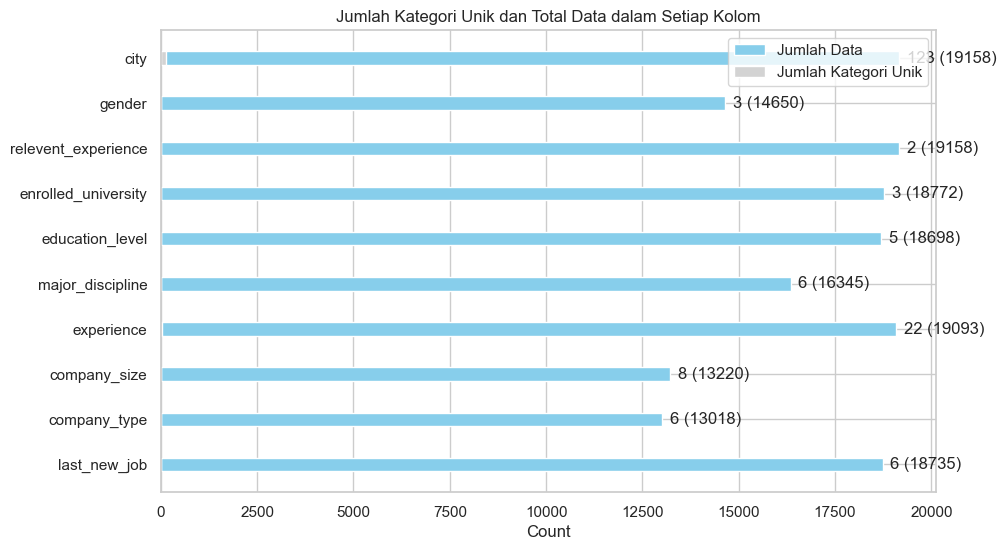

In [76]:
columns = ["city", "gender", "relevent_experience", "enrolled_university", "education_level", "major_discipline", "experience", "company_size", "company_type", "last_new_job"]
count = [19158, 14650, 19158, 18772, 18698, 16345, 19093, 13220, 13018, 18735]
unique_values = [123, 3, 2, 3, 5, 6, 22, 8, 6, 6]

plt.figure(figsize=(10, 6))
bar_width = 0.3 
index = range(len(columns))

plt.barh(index, count, bar_width, color='skyblue', label='Jumlah Data')
plt.barh(index, unique_values, bar_width, color='lightgrey', label='Jumlah Kategori Unik')

for i in index:
    plt.text(count[i] + 200, i, f'{unique_values[i]} ({count[i]})', va='center')

plt.xlabel('Count')
plt.title('Jumlah Kategori Unik dan Total Data dalam Setiap Kolom')
plt.yticks(index, columns)
plt.gca().invert_yaxis()
plt.legend()
plt.show()


Statistik deskriptif untuk kolom kategorikal:</br>

1. Kolom 'gender' memiliki data yang hilang dan berisi jenis kelamin paling umum adalah 'Male' dengan jenis kelamin Unik ada 3 dan Jumlah data 14.650.
2. Kolom 'enrolled_university' memiliki data yang hilang dan mayoritas tidak terdaftar di universitas jumlah Unik 3 dan Jumlah data 18.772.
3. Kolom 'education_level' memiliki data yang hilang dan mayoritas adalah lulusan Nilai Unik: 5 Jumlah Data: 18,698
4. Kolom 'major_discipline' memiliki beberapa nilai unik dan yang paling umum adalah 'STEM' Nilai Unik: 6 Jumlah Data: 16,345.
5. Kolom 'company_size' memiliki data yang hilang dan ukuran '50-99' adalah yang paling umum Nilai Unik: 8 Jumlah Data: 13,220
6. Kolom 'company_type' memiliki data yang hilang dan 'Pvt Ltd' adalah yang paling umum Nilai Unik: 6 Jumlah Data: 13,018
7. Kolom 'last_new_job' memiliki data yang hilang dan '1' adalah yang paling umum Nilai Unik: 6 Jumlah Data: 18,735

<b>!! Kolom gender memiliki 3 nilai unik (seharusnya terdapat 2 gender saja (Male dan Female))</b>

In [77]:
# Menghitung jumlah NaN atau nilai yang kosong
print("Missing Values")
print(df_train.isnull().sum())

#Check for missing values Percentage
print("\nMissing Values Percentage")
print(df_train.isna().sum()/len(df_train))

Missing Values
enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

Missing Values Percentage
enrollee_id               0.000000
city                      0.000000
city_development_index    0.000000
gender                    0.235306
relevent_experience       0.000000
enrolled_university       0.020148
education_level           0.024011
major_discipline          0.146832
experience                0.003393
company_size              0.309949
company_type              0.320493
last_new_job              0.022080
training_hours            0.000000
target                    0.000000
dtype: float64


#### Data yang Tidak Lengkap (NaN): 
Beberapa kolom seperti <b>gender, enrolled_university, education_level, major_discipline, experience, company_size, dan company_type </b> memiliki nilai yang hilang (NaN).

# 1. Descriptive Statistics (Kesimpulan)

A. Semua tipe data sudah sesuai </br>
B. Kolom <b> gender, enrolled_university, education_level, major_discipline, experience, company_size, company_type, last_new job, dan training_hours</b> memiliki nilai kosong </br>
C. Kolom gender yang seharusnya memiliki 2 nilai unik ternyata memiliki 3 nilai unik.

# 2. Univariate Analysis

Gunakan <b>visualisasi</b> untuk melihat distribusi masing-masing kolom (feature maupun target).</br>
Tuliskan hasil observasinya, misalnya jika ada suatu kolom yang distribusinya
menarik</br> (misal skewed, bimodal, ada outlier, ada nilai yang mendominasi, kategorinya
terlalu banyak, dsb).</br> Jelaskan juga apa yang harus di-follow up saat data pre-processing.

### Numerical Features

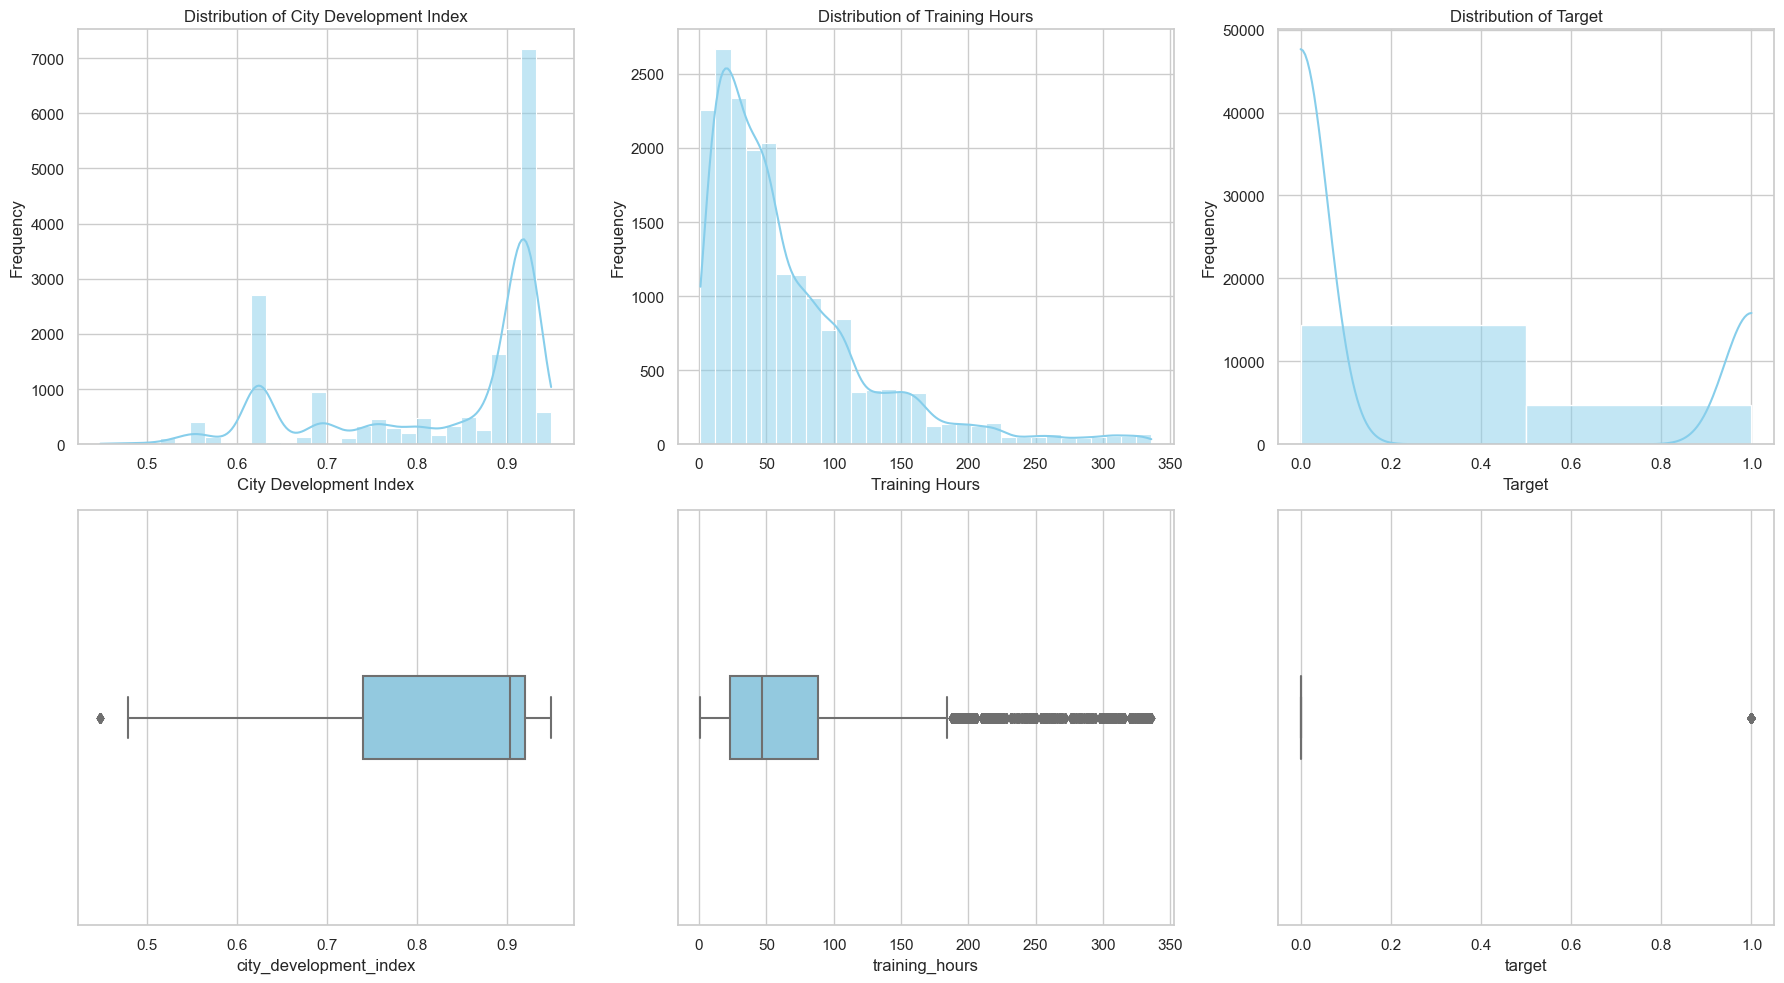

In [78]:
sns.set(style='whitegrid')

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

sns.histplot(ax=axes[0, 0], x=df_train['city_development_index'], bins=30, kde=True, color='skyblue')
axes[0, 0].set_title('Distribution of City Development Index')
axes[0, 0].set_xlabel('City Development Index')
axes[0, 0].set_ylabel('Frequency')
sns.boxplot(ax=axes[1, 0], x=df_train['city_development_index'], color='skyblue', width=0.2)

sns.histplot(ax=axes[0, 1], x=df_train['training_hours'], bins=30, kde=True, color='skyblue')
axes[0, 1].set_title('Distribution of Training Hours')
axes[0, 1].set_xlabel('Training Hours')
axes[0, 1].set_ylabel('Frequency')
sns.boxplot(ax=axes[1, 1], x=df_train['training_hours'], color='skyblue', width=0.2)

sns.histplot(ax=axes[0, 2], x=df_train['target'], bins=2, kde=True, color='skyblue')
axes[0, 2].set_title('Distribution of Target')
axes[0, 2].set_xlabel('Target')
axes[0, 2].set_ylabel('Frequency')
sns.boxplot(ax=axes[1, 2], x=df_train['target'], color='skyblue', width=0.2)

plt.tight_layout()

plt.show()


#### Kesimpulan data numerikal

1. Distribution of City Development Index (Distribusi Indeks Pembangunan Kota):
CDI memiliki distribusi <b>bimodal</b> dengan dua puncak.</br>
Mayoritas data terkonsentrasi di sekitar nilai tengah indeks pembangunan kota.</br>
Terdapat beberapa nilai ekstrem yang diidentifikasi sebagai outlier dalam box plot.</br>
2. Distribution of Training Hours (Distribusi Jam Pelatihan):
Distribusi jam pelatihan <b>skew ke kanan</b> (positively skewed) dengan nilai<b> median yang lebih kecil daripada mean</b> (lihat df.describe pada no.1).
Mayoritas data berpusat di sekitar nilai rendah hingga menengah jam pelatihan.
Terdapat beberapa data yang diidentifikasi sebagai outlier dalam box plot, yang mengindikasikan jam pelatihan yang jauh lebih tinggi dari mayoritas.</br>
3. Distribution of Target (Distribusi Target):
Distribusi target menunjukkan bahwa mayoritas data adalah "non-seeking" (tidak mencari pekerjaan) dengan <b>persentase 3:1</b>.
Dengan kata lain, hanya 25% enrollee adalah pencari pekerjaan baru.

### Categorical Features

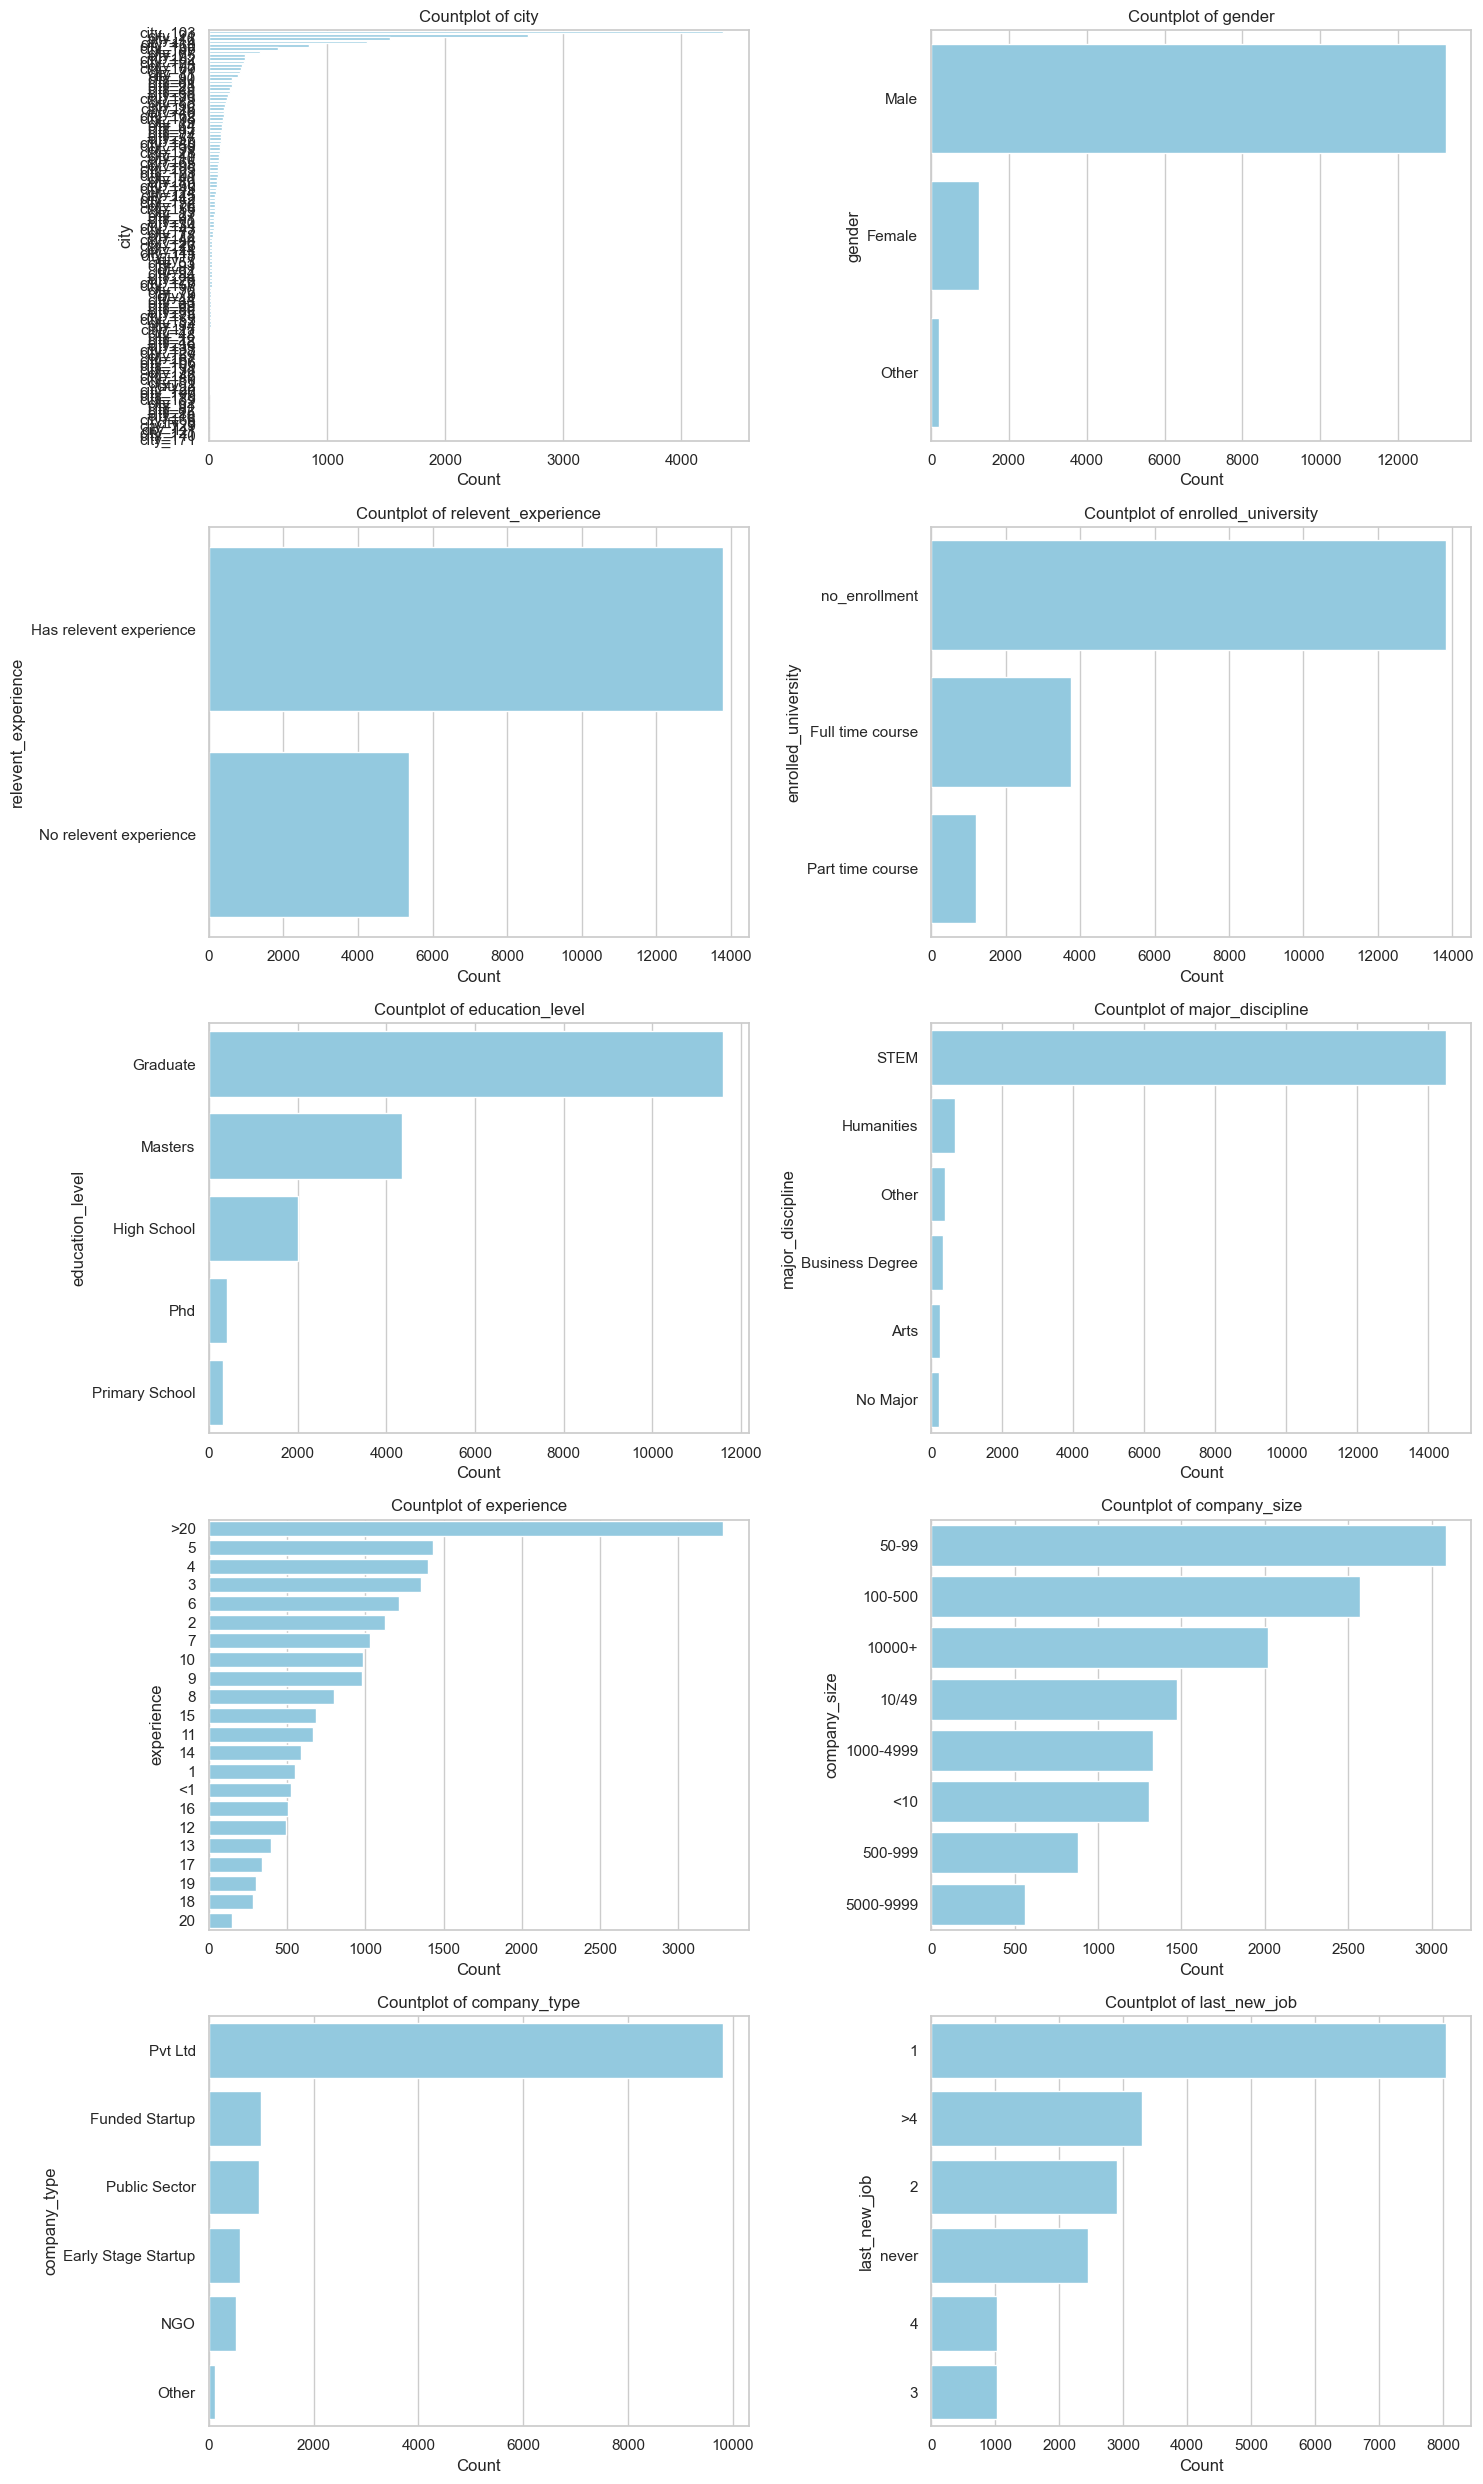

In [79]:
# Select the categorical features
categorical_features = ['city', 'gender', 'relevent_experience', 'enrolled_university',
                        'education_level', 'major_discipline', 'experience', 'company_size',
                        'company_type', 'last_new_job']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 25))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Loop through categorical features and plot bar charts
for i, feature in enumerate(categorical_features):
    sns.countplot(data=df_train, y=feature, ax=axes[i], order=df_train[feature].value_counts().index, color='skyblue')
    axes[i].set_title(f'Countplot of {feature}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel(feature)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

#### Kesimpulan data kategorikal
city: Distribusi kota agak <b>tidak merata</b>, beberapa kota memiliki <b>frekuensi yang tinggi</b>.</br>
gender: Terdapat kategori <b>'Other'</b> yang mungkin perlu diperiksa lebih lanjut. Selain itu, <b>perbedaan frekuensi antara jenis kelamin cukup besar</b>.</br>
relevent_experience: <b>Mayoritas</b> kandidat<B> memiliki pengalaman relevan</b>.</br>
education_level: Kategori <b>'Primary School'</b> memiliki frekuensi yang <b>rendah</b> dibandingkan dengan kategori lainnya.</br>
major_discipline: Mayoritas kandidat memiliki disiplin mayor di bidang <b>Engineering</b>.</br>
experience: Distribusi pengalaman terlihat wajar, namun ada beberapa nilai yang mungkin perlu diinspeksi lebih lanjut.</br>
company_size: Kategori <b>'50-99' dan '100-500' memiliki frekuensi tertinggi</b>. Nilai 10/49 perlu diubah menjadi 10-49</br>
company_type: Mayoritas kandidat bekerja di perusahaan sektor <b>Private</b>.</br>
last_new_job: Mayoritas kandidat telah mengganti pekerjaan dalam waktu <b>kurang dari satu tahun</b>.</br>
target: <b>Distribusi target tidak seimbang</b>, dengan <b>mayoritas</b> kandidat <b>tidak mencari perubahan pekerjaan</b>.</br>

#### Follow-up <b>data preprocessing</b> yang dapat dilakukan meliputi:

Handling Missing Values: Perlu memeriksa dan mengatasi nilai yang hilang pada kolom dengan missing values seperti 'gender','enrolled_university', 'education_level', dsb.</br>
Outlier Detection and Handling: Memeriksa apakah ada outlier pada variabel numerik dan mengambil tindakan yang sesuai jika ada.</br>
Encoding Categorical Variables: Melakukan encoding pada variabel kategorikal untuk mengubahnya menjadi bentuk numerik yang dapat digunakan dalam pemodelan.</br>
Balancing Target: Mengambil tindakan untuk menangani ketidakseimbangan dalam target (oversampling, undersampling, atau metode lainnya).</br>
Feature Scaling: Melakukan normalisasi atau standardisasi pada variabel numerik jika dibutuhkan.</br>
Feature Engineering: Mungkin ada kemungkinan untuk menggabungkan, memisahkan, atau mengubah fitur untuk meningkatkan kinerja model.</br>
Validasi Data: Memastikan bahwa dataset telah divalidasi dengan benar untuk mengidentifikasi potensi masalah atau anomali lain yang perlu ditangani.

# 3. Multivariate Analysis + 4. Business Insight
Lakukan multivariate analysis (seperti correlation heatmap dan category plots, sesuai yang
diajarkan di kelas).</br> Tuliskan hasil observasinya, seperti:</br>
A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana
saja yang paling relevan dan harus dipertahankan?</br>
B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu
dilakukan terhadap feature itu?</br>
* Tuliskan juga jika memang tidak ada feature yang saling berkorelasi

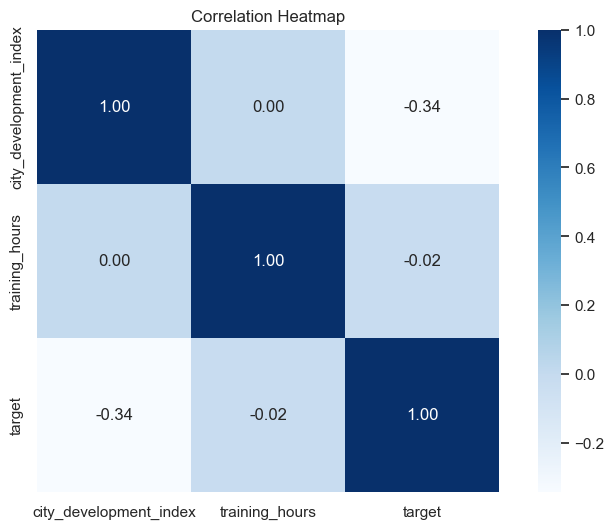

In [80]:
# Selecting the numerical features and target
numerical_features = ['city_development_index', 'training_hours', 'target']

# Subset the DataFrame with only the numerical features
numerical_df = df_train[numerical_features]

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f', square=True)
plt.title('Correlation Heatmap')
plt.show()


Dari heatmap korelasi antara fitur-fitur numerik dan target ("city_development_index", "training_hours," dan "target"), kita dapat membuat beberapa kesimpulan:

1. City Development Index (CDI): Korelasi antara CDI dan target sangat rendah (0.04). Ini menunjukkan bahwa <b>CDI tidak memiliki pengaruh signifikan terhadap keputusan pencari kerja untuk mencari pekerjaan baru.</b>

2. Training Hours: Korelasi antara jumlah jam pelatihan ("training_hours") dan target juga rendah (-0.021). Ini menunjukkan bahwa <b>jumlah jam pelatihan yang diambil oleh pencari kerja juga tidak memiliki pengaruh signifikan terhadap keputusan mereka untuk mencari pekerjaan baru.</b>

Kesimpulannya, dari analisis korelasi, tidak ada fitur numerik yang memiliki korelasi yang kuat dengan kolom "target." Ini menunjukkan bahwa keputusan pencari kerja untuk mencari pekerjaan baru <b>kemungkinan besar dipengaruhi oleh faktor-faktor lain yang tidak tercakup dalam fitur-fitur numerik ini.</b> Oleh karena itu, penting untuk mempertimbangkan fitur-fitur lain atau faktor-faktor kualitatif dalam analisis yang mungkin lebih memengaruhi keputusan pencari kerja.

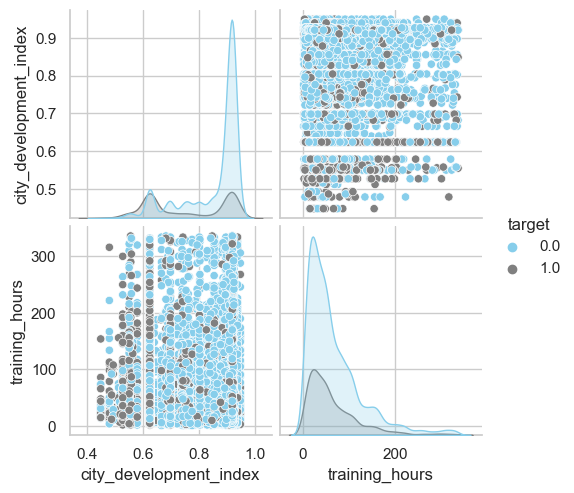

In [81]:
custom_palette = ["skyblue", "grey"]

# Define selected features for the pairplot
selected_features = ['city_development_index', 'training_hours', 'target']

# Create pairplot for selected features
sns.pairplot(df_train[selected_features], hue='target', palette=custom_palette, diag_kind='kde')
plt.show()

Pairplot ini memvisualisasikan hubungan antara variabel 'city_development_index' dan 'training_hours' dengan membedakan berdasarkan variabel target.
Seaborn pairplot digunakan untuk memahami sebaran data antara variabel 'city_development_index' dan 'training_hours' terhadap target (1 atau 0).
Tidak ada perbedaan signifikan dalam pola antara orang yang mencari pekerjaan baru (target 1) dan yang tidak (target 0) berdasarkan hubungan antara 'city_development_index' dan 'training_hours'. Ini terlihat dari sebaran titik-titik yang relatif seragam.

Hasil dari korelasi antara 'city_development_index' dan 'training_hours' terhadap target tidak ditampilkan dalam visualisasi. Namun, Anda dapat melihat korelasi ini di luar pairplot.
Nilai korelasi antara 'city_development_index' dan 'training_hours' dengan target akan memberikan informasi lebih lanjut tentang sejauh mana kedua fitur ini berhubungan dengan variabel target.
Kesimpulannya, pairplot mengungkapkan perbedaan yang signifikan dalam pola data antara variabel 'city_development_index' dan 'training_hours' dengan variabel target. 

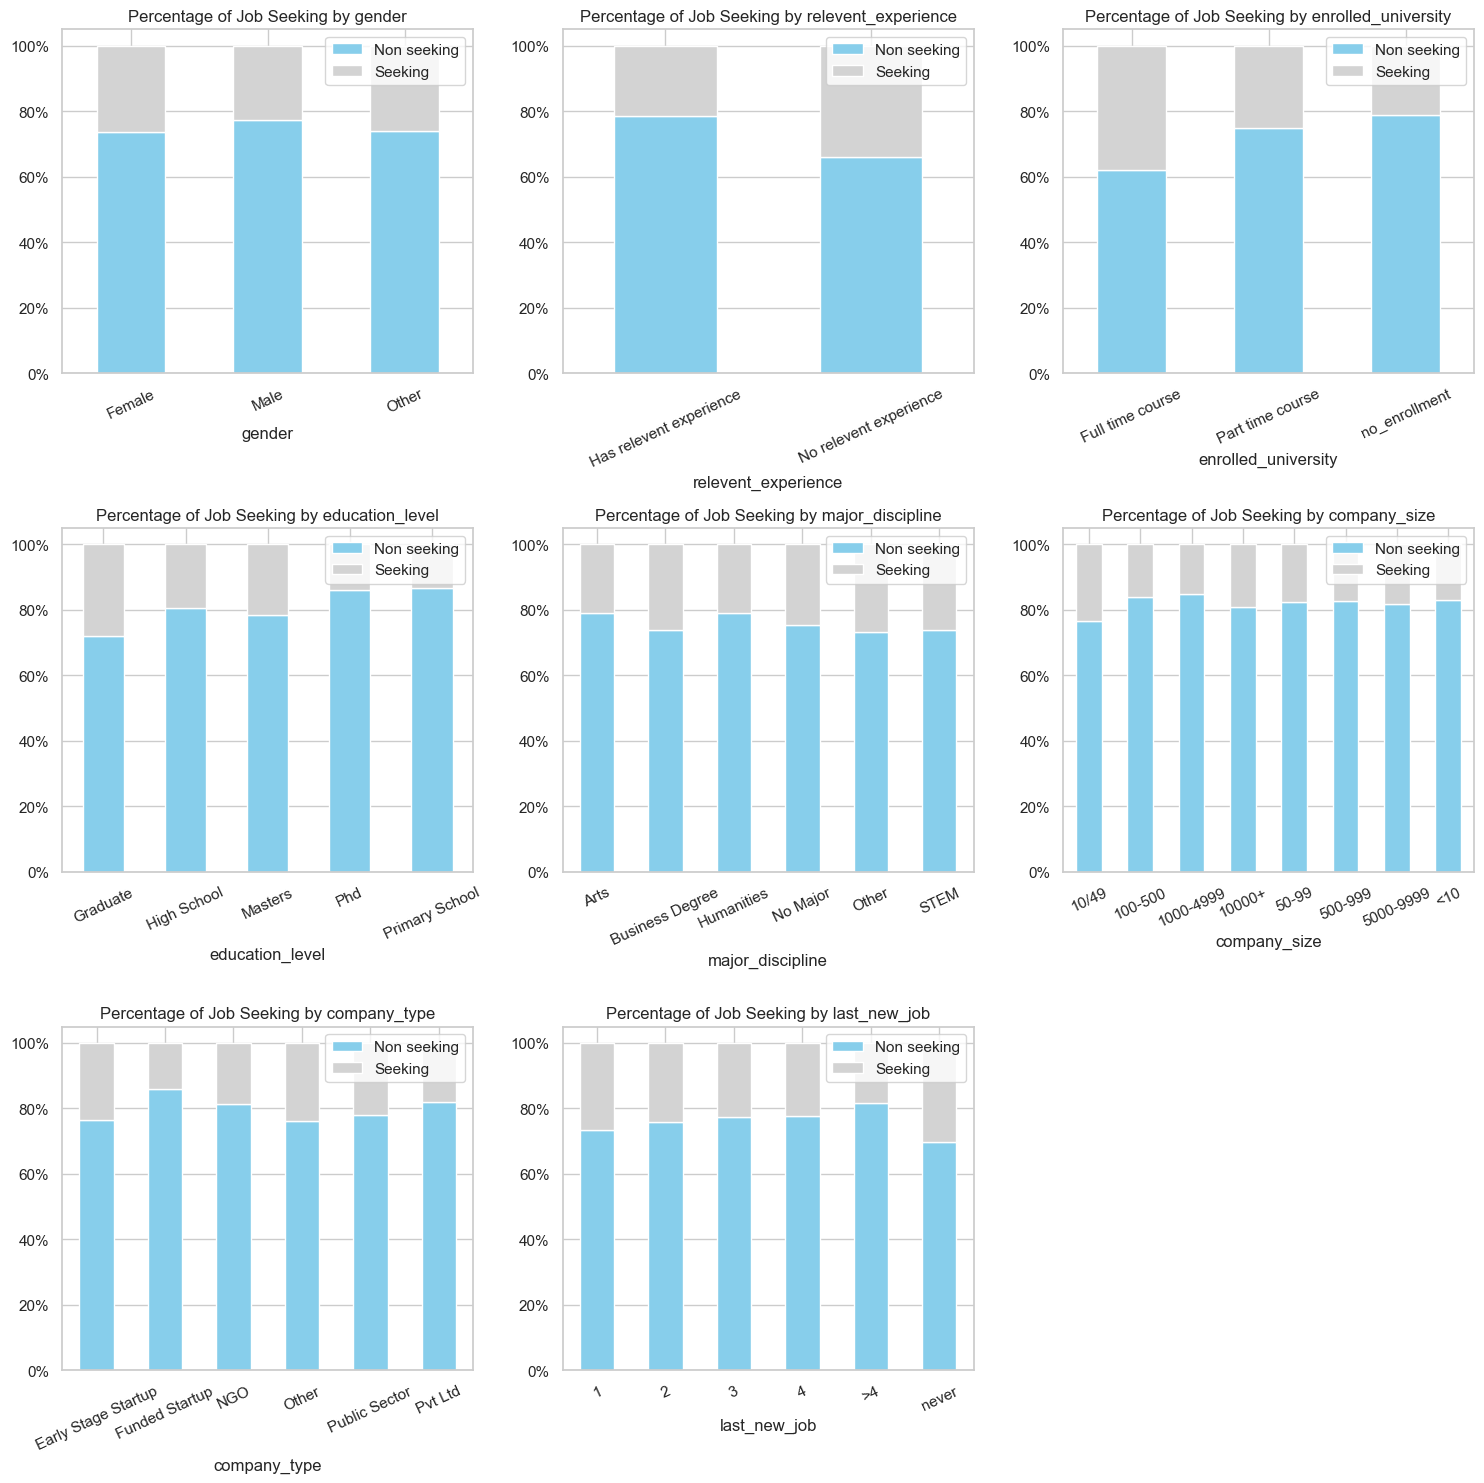

In [82]:
cats1 = ['gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'company_size', 'company_type', 'last_new_job']

num_categories = len(cats1)
subplots_per_row = 3
num_rows = (num_categories + subplots_per_row - 1) // subplots_per_row

fig, axes = plt.subplots(num_rows, subplots_per_row, figsize=(15, num_rows * 5))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Define the colors for 'Non seeking' and 'Seeking'
colors = ['skyblue', 'lightgrey']

for i, cols in enumerate(cats1, 1):
    data = df_train.groupby([cols, 'target'])['target'].count().unstack().fillna(0)
    data_percentage = data.div(data.sum(axis=1), axis=0)

    row = (i - 1) // subplots_per_row
    col = (i - 1) % subplots_per_row

    ax = data_percentage.plot(kind='bar', stacked=True, color=colors, ax=axes[row, col])
    ax.set_title(f'Percentage of Job Seeking by {cols}')
    ax.legend(labels=('Non seeking', 'Seeking'))
    ax.set_xticklabels(data_percentage.index, rotation=25)
    ax.set_yticklabels(['{:.0%}'.format(x) for x in ax.get_yticks()])

for i in range(num_categories, num_rows * subplots_per_row):
    row = i // subplots_per_row
    col = i % subplots_per_row
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()


Dari visualisasi yang disajikan, kita dapat menarik beberapa kesimpulan terkait dengan persentase pencari pekerjaan (seeking) berdasarkan berbagai kategori yang terdapat dalam dataset:

1. <b>Gender</b> (Jenis Kelamin):
Presentase "Seeking' pada gender Female lebih tinggi dibandingkan Male. Mayoritas data menunjukkan persentase "Non Seeking" yang lebih tinggi daripada "Seeking" di semua kelompok jenis kelamin.

2. <b>Relevant Experience </b>(Pengalaman Terkait):
Orang-orang dengan pengalaman terkait cenderung memiliki persentase "Non seeking" yang lebih tinggi dibandingkan dengan yang tidak memiliki pengalaman terkait.

3. <b>Enrolled University </b>(Status Pendaftaran Universitas):
Orang-orang yang terdaftar di universitas memiliki persentase "Seeking" yang lebih tinggi dibandingkan dengan mereka yang tidak terdaftar di universitas.
Mungkin ada korelasi antara tidak terdaftarnya di universitas dengan pencarian pekerjaan baru.

4. <b>Education Level</b> (Tingkat Pendidikan):
Tidak ada tren yang konsisten dalam persentase pencari pekerjaan berdasarkan tingkat pendidikan. Namun, individu dengan tingkat pendidikan "Graduate" cenderung memiliki persentase "Seeking" yang lebih tinggi.

5. <b>Major Discipline </b>(Disiplin Ilmu Utama):
Tidak ada perbedaan yang signifikan dalam persentase pencari pekerjaan berdasarkan disiplin ilmu utama.
Persentase "Non seeking" lebih dominan dalam semua disiplin ilmu utama.

6. <b>Company Size</b> (Ukuran Perusahaan):
Individu yang bekerja di perusahaan dengan ukuran 10-49 orang cenderung memiliki persentase "Seeking" yang lebih tinggi.
Perusahaan dengan ukuran 100-500 dan 1000-4999 memiliki persentase "Non seeking" yang lebih tinggi.

7. <b>Company Type</b> (Jenis Perusahaan):
Perusahaan berjenis 'Funded Startup' memiliki presentase 'Seeking' terkecil dibanding jenis perusahaan lainnya.

8. <b>Last New Job</b> (Pekerjaan Terakhir):
Orang-orang yang telah bekerja dalam pekerjaan sebelumnya selama 1 tahun memiliki persentase "Seeking" yang lebih tinggi.
Individu dengan pekerjaan terakhir selama 4-5 tahun cenderung memiliki persentase "Non seeking" yang lebih tinggi.

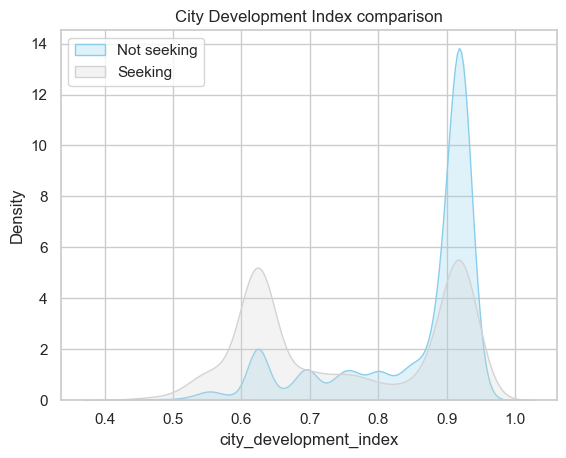

In [83]:
df0 = df_train[df_train['target']==0]
df1 = df_train[df_train['target']==1]

fig = sns.kdeplot(df0['city_development_index'] , fill=True, color="skyblue")
fig = sns.kdeplot(df1['city_development_index'], fill=True, color="lightgrey")
plt.title('City Development Index comparison')
plt.legend(labels=('Not seeking','Seeking'), loc='upper left')
plt.show()

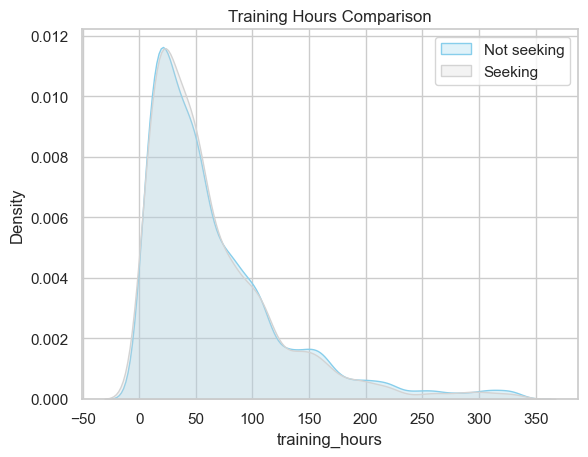

In [84]:
df0 = df_train[df_train['target']==0]
df1 = df_train[df_train['target']==1]

fig = sns.kdeplot(df0['training_hours'] , fill=True, color="skyblue")
fig = sns.kdeplot(df1['training_hours'], fill=True, color="lightgrey")
plt.title('Training Hours Comparison')
plt.legend(labels=('Not seeking','Seeking'), loc='upper right')
plt.show()

Dalam visualisasi "City Development Index comparison", terdapat dua distribusi yang dibandingkan, yaitu "Not seeking" (Tidak mencari pekerjaan) dan "Seeking" (Mencari pekerjaan) dengan menggunakan kernel density estimation (KDE). Berikut adalah kesimpulan dari grafik tersebut:

1. Warna biru mewakili mereka yang tidak mencari pekerjaan (Not seeking).
2. Warna abu-abu mewakili mereka yang sedang mencari pekerjaan (Seeking).
3. Perpotongan antara grafik seeking dan non seeking pada CDI 0.75 menunjukan <b>mayoritas pencari pekerjaan baru (seeking) bertempat pada kota dengan CDI yang rendah (<0.75)</b>. Para <b>non-pencari kerja</b> bertempat mayoritas pada kota dengan <b>CDI > 0.75</b>.

### Business Insight

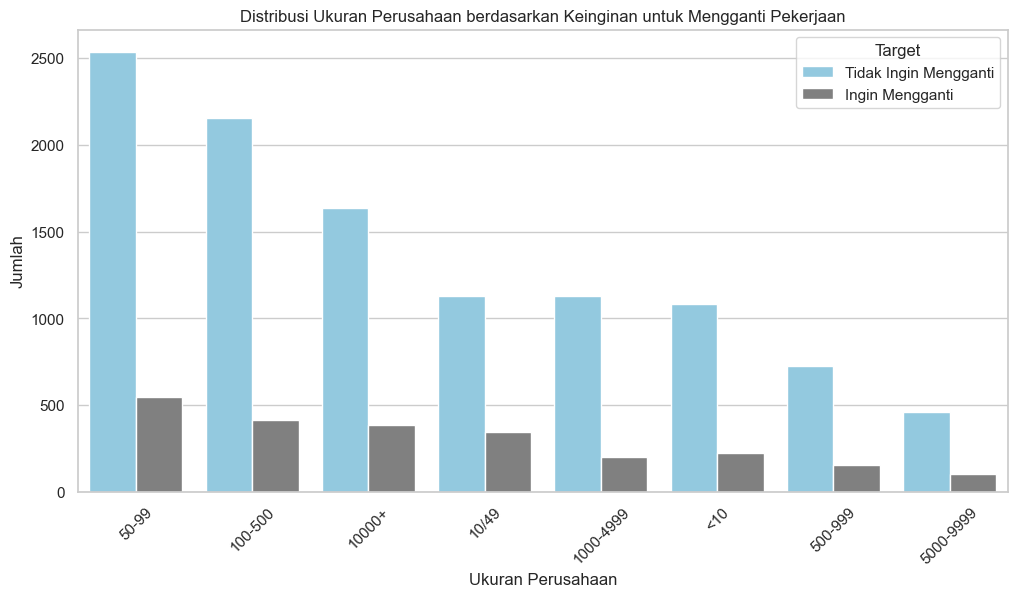

In [85]:
plt.figure(figsize=(12, 6))
custom_palette = ["skyblue", "grey"]
sns.countplot(data=df_train, x='company_size', hue='target', order=df_train['company_size'].value_counts().index, palette=custom_palette)
plt.title('Distribusi Ukuran Perusahaan berdasarkan Keinginan untuk Mengganti Pekerjaan')
plt.xlabel('Ukuran Perusahaan')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.legend(title='Target', labels=['Tidak Ingin Mengganti', 'Ingin Mengganti'])
plt.show()

<Figure size 1200x600 with 0 Axes>

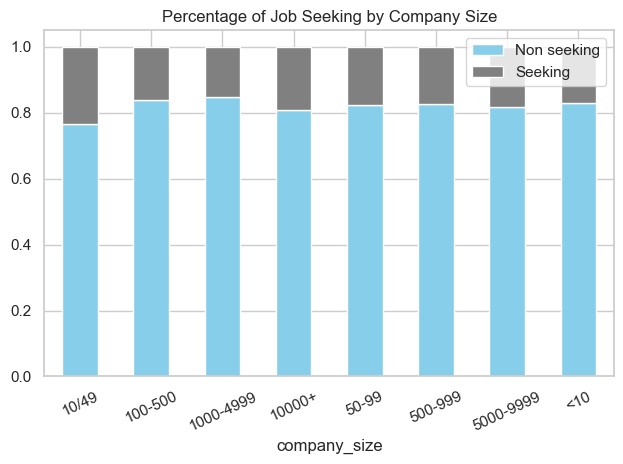

In [86]:
plt.figure(figsize=(12,6))
df_train.groupby('company_size')['target'].value_counts(normalize=True).unstack('target').plot.bar(stacked=True, color=custom_palette)
plt.title(f'Percentage of Job Seeking by Company Size')
plt.legend(labels=('Non seeking', 'Seeking'))
plt.xticks(rotation = 25)
    
plt.tight_layout()
plt.show()

Dalam plot distribusi ukuran perusahaan berdasarkan keinginan untuk mengganti pekerjaan, kami menggunakan warna "skyblue" untuk merepresentasikan kategori "Tidak Ingin Mengganti" dan warna "grey" untuk merepresentasikan kategori "Ingin Mengganti". Beberapa kesimpulan dari plot ini adalah:

1. Walaupun secara jumlah, perusahaan berukuran "50-99" dan "100-500" menjadi perusahaan dengan jumlah sampel enrollee terbanyak, namun secara presentase, kedua perusahaan tersebut memiliki jumlah "Seeker" yang masih di bawah 20%.

2. Begitupun dengan ukuran perusahaan "500-999" dan "5000-9999", dengan jumlah sampel yang sedikit, kedua perusahaan tersebut-pun masih memiliki presentase "Seeker" di bawah 20%.

3. Sebaliknya, satu-satunya perusahaan yang memiliki presentase pencari pekerjaan lebih dari 20% adalah yang berukuran "10-49".

Insight Bisnis :

1. Penyelidikan Lanjutan: Meskipun tidak ada ukuran perusahaan yang secara signifikan mendominasi, perusahaan berukuran "50-99" tampaknya menarik bagi karyawan baik yang ingin mengganti pekerjaan maupun yang tidak. Bisnis dapat melakukan penyelidikan lebih lanjut untuk memahami faktor-faktor yang membuat ukuran perusahaan ini menarik.

2. Perbedaan Preferensi: Distribusi ukuran perusahaan yang bervariasi menunjukkan bahwa preferensi karyawan dalam hal ukuran perusahaan dapat sangat beragam. Ini menyoroti pentingnya beragam dalam strategi rekrutmen dan retensi karyawan.

3. Strategi HR: Analisis ini dapat membantu departemen sumber daya manusia (HR) dalam merancang strategi untuk menjaga karyawan yang sudah ada dan merekrut karyawan baru. Misalnya, perusahaan dengan ukuran "50-99" dapat menjadi fokus bagi upaya rekrutmen.

4. Pemahaman Pasar Tenaga Kerja: Mengetahui preferensi karyawan terkait ukuran perusahaan dapat membantu bisnis dalam memahami pasar tenaga kerja dan merespons perubahan dalam preferensi karyawan.

5. Bisa dipertimbangkan mengingat perusahaaan di kota dengan CDI >0.75 memiliki retention rate yang lebih tinggi untuk berfokus pada penempatan perusahaan baru di kota-kota dengan CDI yang lebih tinggi.

6. Perlu penyelidikan lebih lanjut khusus untuk perusahaan berukuran <b> 10-49</b> untuk mengetahui penyebab tingginya presentase enrollee yang mencari pekerjaan baru.

7. Pentingnya 'relevant experience': Karyawan yang memiliki pengalaman terkait dapat lebih diprioritaskan untuk training mengingat rate of retention mereka yang lebih tinggi.

8. Rate of retention <b>'Graduate'</b> yang hanya sekitar 70% dapat diteliti lebih lanjut, apakah faktor kausalnya. 

## Data Cleansing

### A. Handle missing values

In [87]:
# Menghitung jumlah NaN atau nilai yang kosong
print("Missing Values")
print(df_train.isnull().sum())

#Check for missing values Percentage
print("\nMissing Values Percentage")
print(df_train.isna().sum()/len(df_train))

Missing Values
enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

Missing Values Percentage
enrollee_id               0.000000
city                      0.000000
city_development_index    0.000000
gender                    0.235306
relevent_experience       0.000000
enrolled_university       0.020148
education_level           0.024011
major_discipline          0.146832
experience                0.003393
company_size              0.309949
company_type              0.320493
last_new_job              0.022080
training_hours            0.000000
target                    0.000000
dtype: float64


In [88]:
#Mengisi Missing Value
for column in columns:
    if df_train[column].isnull().sum()>0:
        df_train[column].replace(np.nan,df_train[column].mode()[0],inplace=True)

In [89]:
df_train.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

Handle Missing value di setiap kolom dengan modus

### B. Handle Duplicate Data

In [90]:
df_train.duplicated().sum()

0

Tidak ada data yang duplicate

### C. Handle outliers

In [91]:
#4. Filtering Outliers using Z-score
# Penjelasan: Filtering hanya dilakukan pada kolom 'city_development_index','training_hours'
# Kolom-kolom ini diharapkan menjadi fitur yang akan digunakan pada pemodelan dan dapat memprediksi 

from scipy import stats

In [92]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df_train)}')

filtered_entries = np.array([True] * len(df_train))

for col in ['city_development_index','training_hours']:
    zscore = abs(stats.zscore(df_train[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df = df_train[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 19158
Jumlah baris setelah memfilter outlier: 18691


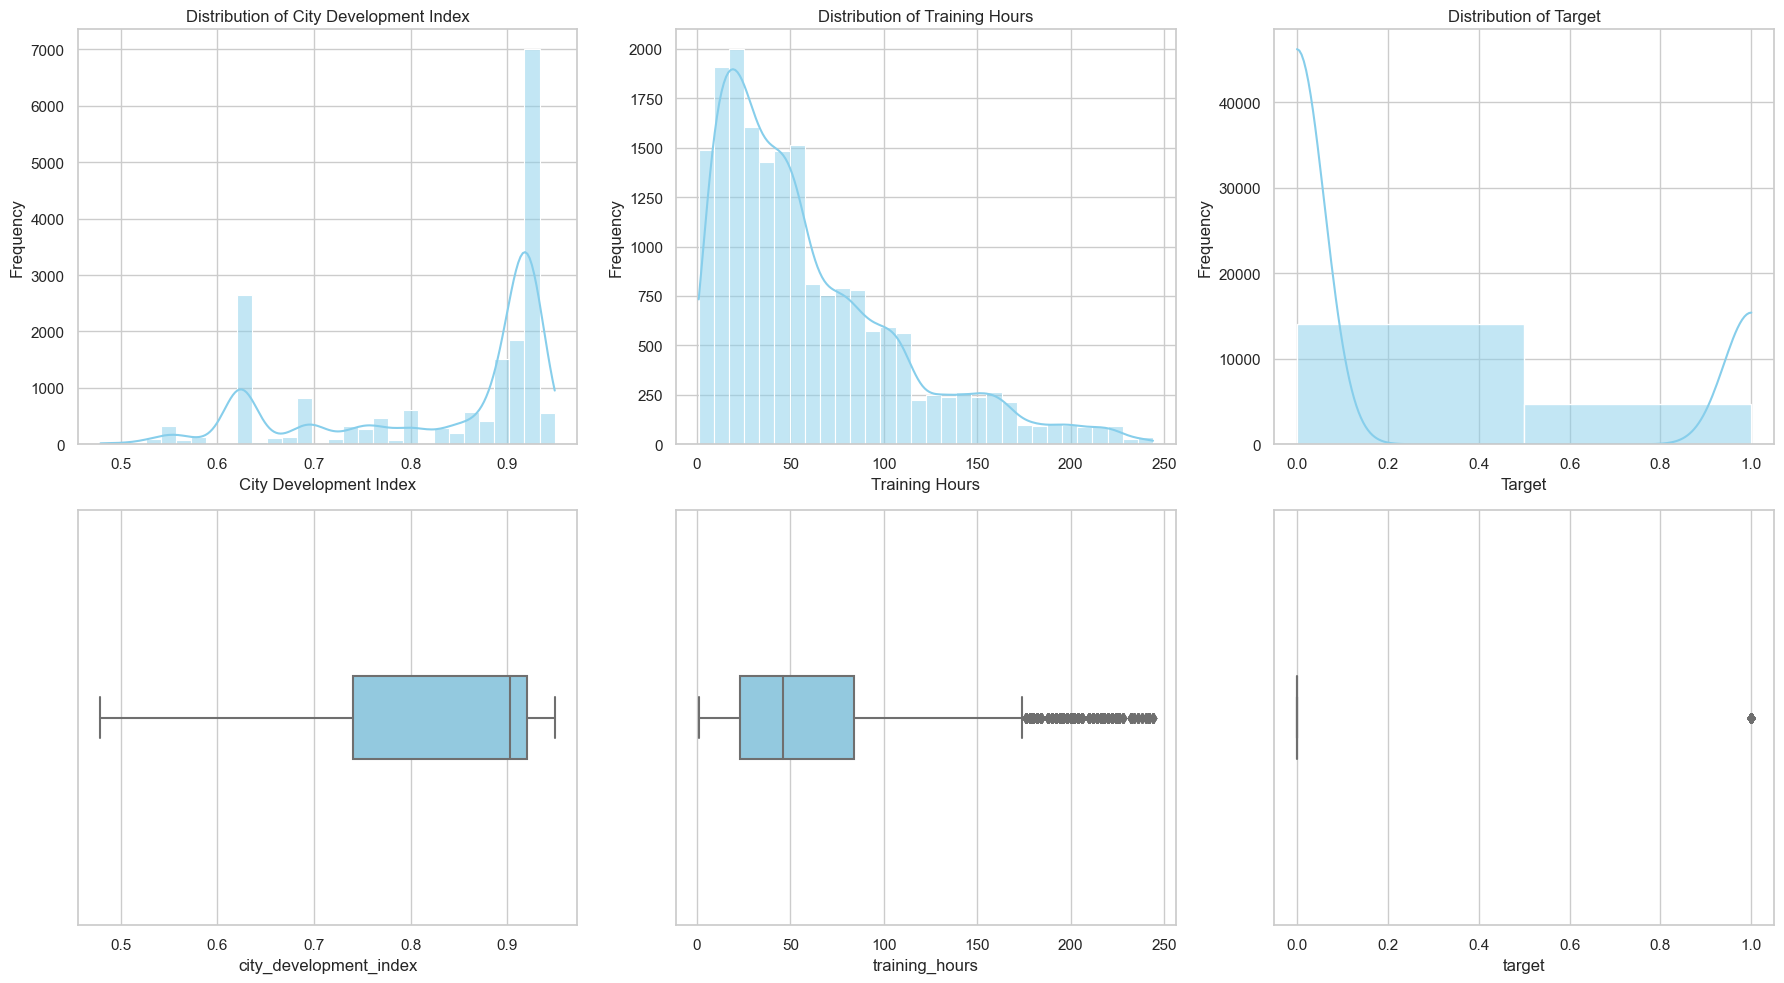

In [93]:
#Distribusi data berdasarkan numerical setelah droping rows
sns.set(style='whitegrid')

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

sns.histplot(ax=axes[0, 0], x=df['city_development_index'], bins=30, kde=True, color='skyblue')
axes[0, 0].set_title('Distribution of City Development Index')
axes[0, 0].set_xlabel('City Development Index')
axes[0, 0].set_ylabel('Frequency')
sns.boxplot(ax=axes[1, 0], x=df['city_development_index'], color='skyblue', width=0.2)

sns.histplot(ax=axes[0, 1], x=df['training_hours'], bins=30, kde=True, color='skyblue')
axes[0, 1].set_title('Distribution of Training Hours')
axes[0, 1].set_xlabel('Training Hours')
axes[0, 1].set_ylabel('Frequency')
sns.boxplot(ax=axes[1, 1], x=df['training_hours'], color='skyblue', width=0.2)

sns.histplot(ax=axes[0, 2], x=df['target'], bins=2, kde=True, color='skyblue')
axes[0, 2].set_title('Distribution of Target')
axes[0, 2].set_xlabel('Target')
axes[0, 2].set_ylabel('Frequency')
sns.boxplot(ax=axes[1, 2], x=df['target'], color='skyblue', width=0.2)

plt.tight_layout()

plt.show()

### D. Feature Transformation

In [94]:
# Transformasi fitur2 (normalisasi, standardisasi dan np log)

from sklearn.preprocessing import MinMaxScaler, StandardScaler


df['cdi_norm'] =MinMaxScaler().fit_transform(df['city_development_index'].values.reshape(len(df), 1))
df['cdi_std'] = StandardScaler().fit_transform(df['city_development_index'].values.reshape(len(df), 1))
df['cdi_log']= np.log(df['city_development_index'])

df['th_norm'] =MinMaxScaler().fit_transform(df['training_hours'].values.reshape(len(df), 1))
df['th_std'] = StandardScaler().fit_transform(df['training_hours'].values.reshape(len(df), 1))
df['th_log']= np.log(df['training_hours'])

df['target_norm'] =MinMaxScaler().fit_transform(df['target'].values.reshape(len(df), 1))
df['target_std'] = StandardScaler().fit_transform(df['target'].values.reshape(len(df), 1))
df['target_log']= np.log(df['target'])



In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18691 entries, 0 to 19157
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             18691 non-null  int64  
 1   city                    18691 non-null  object 
 2   city_development_index  18691 non-null  float64
 3   gender                  18691 non-null  object 
 4   relevent_experience     18691 non-null  object 
 5   enrolled_university     18691 non-null  object 
 6   education_level         18691 non-null  object 
 7   major_discipline        18691 non-null  object 
 8   experience              18691 non-null  object 
 9   company_size            18691 non-null  object 
 10  company_type            18691 non-null  object 
 11  last_new_job            18691 non-null  object 
 12  training_hours          18691 non-null  int64  
 13  target                  18691 non-null  float64
 14  cdi_norm                18691 non-null

<Figure size 640x480 with 0 Axes>

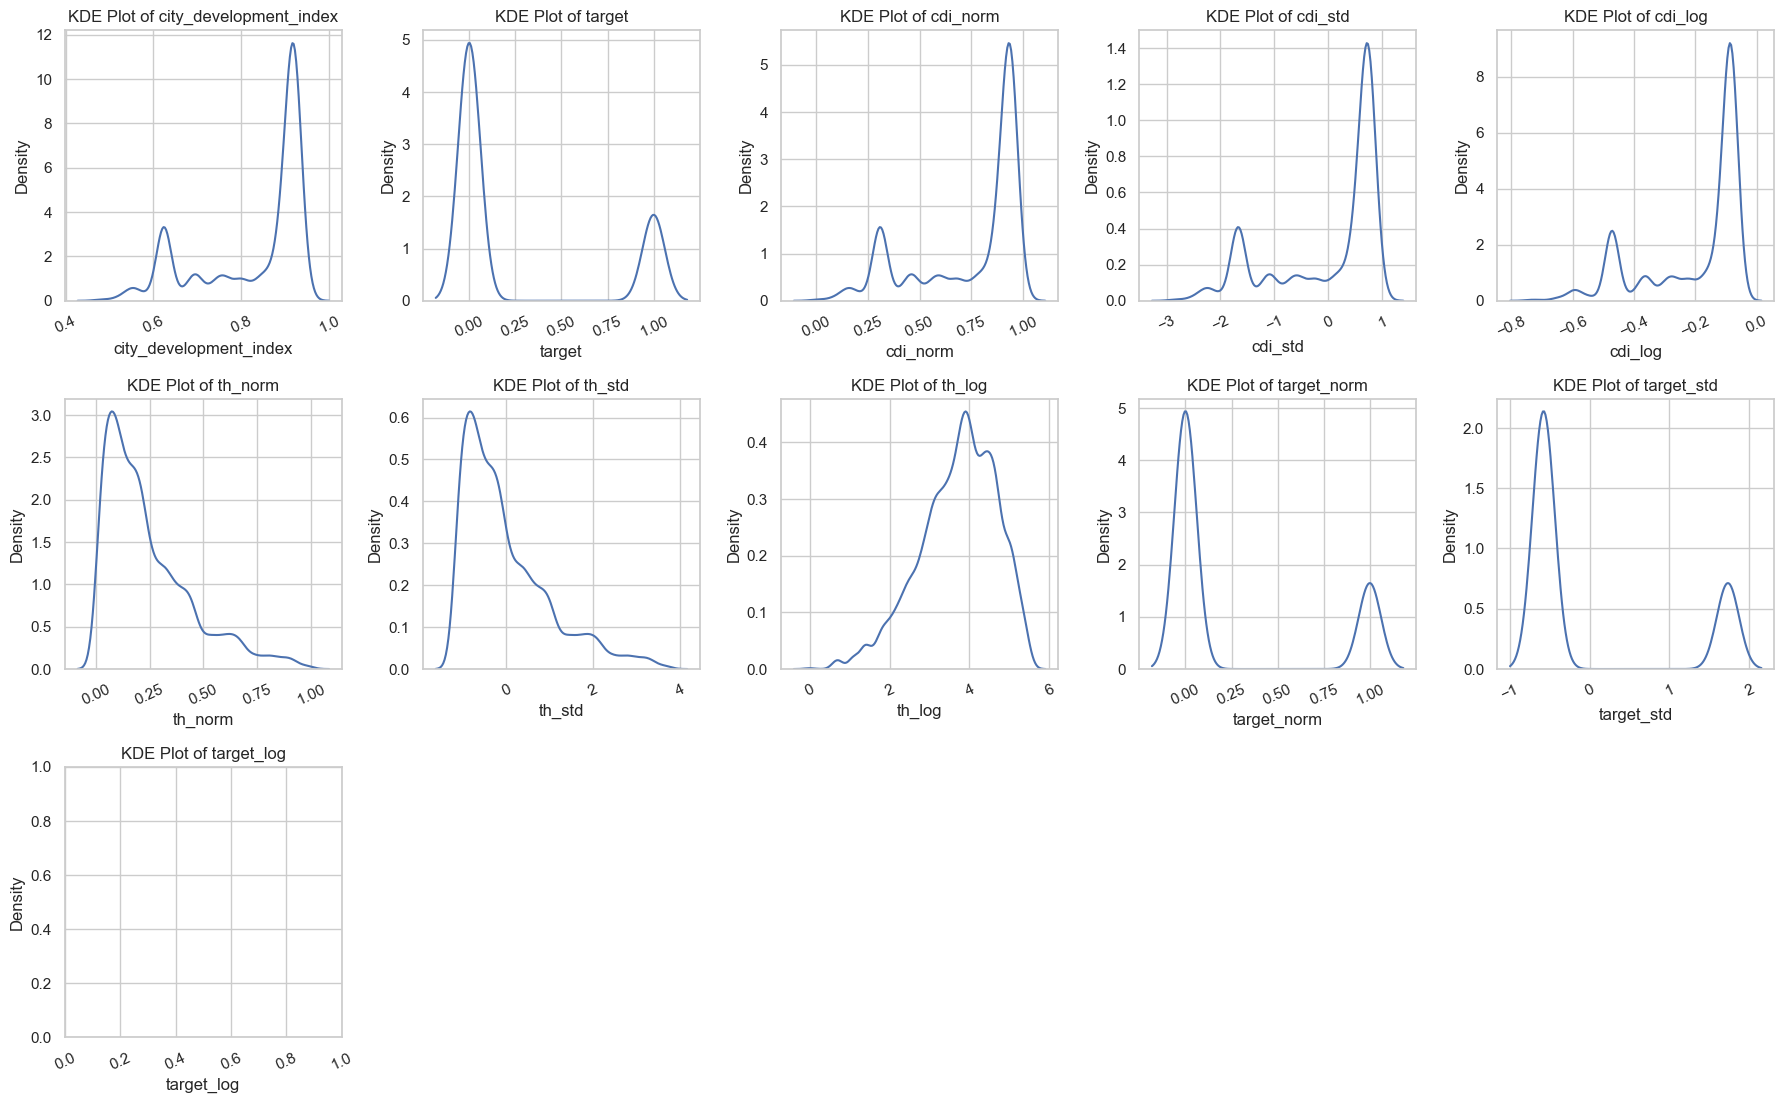

In [96]:
#Melihat distribusi setelah transformasi fitur

new_nums_df = df.select_dtypes(include='float64')
new_nums = new_nums_df.columns


plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.figure( figsize=(18, 18))
for i, cols in enumerate(new_nums, 0):
    plt.subplot(5, 5, i+1)
    sns.kdeplot(data=df, x=cols)
    plt.title(f'KDE Plot of {cols}')
    plt.xticks(rotation = 25)
plt.tight_layout()
plt.show()

### E. Feature Encoding

In [97]:
# Mengganti tanda "/" dengan tanda "-"
# Mengganti 10/49 menjadi 10-49

df['company_size'] = df['company_size'].str.replace('/', '-')

# Mengganti "100-500" menjadi "100-499"
df['company_size'] = df['company_size'].str.replace('100-500', '100-499')

In [98]:
df.sample(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,...,target,cdi_norm,cdi_std,cdi_log,th_norm,th_std,th_log,target_norm,target_std,target_log
1066,18667,city_21,0.624,Male,Has relevent experience,Full time course,Graduate,STEM,2,100-499,...,0.0,0.308511,-1.671303,-0.471605,0.045267,-0.976745,2.484907,0.0,-0.577288,-inf
13938,26039,city_103,0.920,Male,No relevent experience,Full time course,Graduate,STEM,1,1000-4999,...,1.0,0.938298,0.738531,-0.083382,0.037037,-1.017513,2.302585,1.0,1.732236,0.0
10149,19036,city_16,0.910,Female,Has relevent experience,no_enrollment,Graduate,STEM,1,500-999,...,0.0,0.917021,0.657117,-0.094311,0.185185,-0.283701,3.828641,0.0,-0.577288,-inf
1519,21255,city_99,0.915,Male,Has relevent experience,no_enrollment,High School,STEM,>20,1000-4999,...,0.0,0.927660,0.697824,-0.088831,0.102881,-0.691374,3.258097,0.0,-0.577288,-inf
2156,12615,city_11,0.550,Male,Has relevent experience,no_enrollment,Graduate,STEM,5,100-499,...,1.0,0.151064,-2.273761,-0.597837,0.934156,3.426127,5.429346,1.0,1.732236,0.0


In [99]:
#label encoding feature gender
gender_mapping = {
    'Female': 0,
    'Male': 1,
    'Other': 2
}

df['gender'] = df['gender'].map(gender_mapping)


In [100]:
df.sample(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,...,target,cdi_norm,cdi_std,cdi_log,th_norm,th_std,th_log,target_norm,target_std,target_log
3629,25424,city_91,0.691,1,No relevent experience,Full time course,High School,STEM,2,50-99,...,0.0,0.451064,-1.125834,-0.369615,0.222222,-0.100248,4.007333,0.0,-0.577288,-inf
8617,7571,city_103,0.920,1,Has relevent experience,no_enrollment,Phd,STEM,>20,10000+,...,0.0,0.938298,0.738531,-0.083382,0.325103,0.409344,4.382027,0.0,-0.577288,-inf
5456,29520,city_114,0.926,1,No relevent experience,Full time course,Graduate,STEM,8,50-99,...,1.0,0.951064,0.787379,-0.076881,0.374486,0.653948,4.521789,1.0,1.732236,0.0
8809,8307,city_100,0.887,1,No relevent experience,no_enrollment,Graduate,No Major,>20,100-499,...,0.0,0.868085,0.469867,-0.119910,0.082305,-0.793292,3.044522,0.0,-0.577288,-inf
17578,22087,city_160,0.920,1,Has relevent experience,no_enrollment,Graduate,STEM,>20,100-499,...,0.0,0.938298,0.738531,-0.083382,0.037037,-1.017513,2.302585,0.0,-0.577288,-inf


In [101]:
#label encoding feature relevant_experience
relevent_experience_mapping = {
    'No relevent experience': 0,
    'Has relevent experience': 1
}
df['relevent_experience'] = df['relevent_experience'].map(relevent_experience_mapping)

In [102]:
df.sample(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,...,target,cdi_norm,cdi_std,cdi_log,th_norm,th_std,th_log,target_norm,target_std,target_log
9324,27378,city_16,0.910,1,0,no_enrollment,Primary School,STEM,3,50-99,...,0.0,0.917021,0.657117,-0.094311,0.193416,-0.242933,3.871201,0.0,-0.577288,-inf
10951,4374,city_103,0.920,1,0,no_enrollment,High School,STEM,5,50-99,...,1.0,0.938298,0.738531,-0.083382,0.456790,1.061621,4.718499,1.0,1.732236,0.0
2560,20979,city_102,0.804,1,1,no_enrollment,Masters,STEM,>20,100-499,...,0.0,0.691489,-0.205864,-0.218156,0.069959,-0.854443,2.890372,0.0,-0.577288,-inf
17335,18227,city_100,0.887,1,0,no_enrollment,Masters,Business Degree,<1,50-99,...,1.0,0.868085,0.469867,-0.119910,0.613169,1.836201,5.010635,1.0,1.732236,0.0
15964,23983,city_75,0.939,1,1,Part time course,Graduate,STEM,>20,10000+,...,0.0,0.978723,0.893216,-0.062940,0.139918,-0.507921,3.555348,0.0,-0.577288,-inf


In [103]:
#label encoding feature enrolled_university
enrolled_university_mapping = {
    'no_enrollment': 0,
    'Part time course': 1,
    'Full time course': 2
}
df['enrolled_university'] = df['enrolled_university'].map(enrolled_university_mapping)

In [104]:
df.sample(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,...,target,cdi_norm,cdi_std,cdi_log,th_norm,th_std,th_log,target_norm,target_std,target_log
9484,29447,city_28,0.939,1,0,0,Phd,STEM,>20,100-499,...,0.0,0.978723,0.893216,-0.062940,0.185185,-0.283701,3.828641,0.0,-0.577288,-inf
8438,23509,city_16,0.910,1,1,0,Graduate,Other,>20,<10,...,0.0,0.917021,0.657117,-0.094311,0.102881,-0.691374,3.258097,0.0,-0.577288,-inf
9242,16538,city_65,0.802,1,1,0,Graduate,STEM,11,100-499,...,0.0,0.687234,-0.222146,-0.220647,0.127572,-0.569072,3.465736,0.0,-0.577288,-inf
15190,19,city_23,0.899,1,1,1,Graduate,STEM,5,50-99,...,0.0,0.893617,0.567563,-0.106472,0.185185,-0.283701,3.828641,0.0,-0.577288,-inf
9948,25163,city_28,0.939,2,0,0,High School,STEM,4,50-99,...,0.0,0.978723,0.893216,-0.062940,0.045267,-0.976745,2.484907,0.0,-0.577288,-inf


In [105]:
#label encoding feature education_level
education_level_mapping = {
    'Primary School': 0,
    'High School': 1,
    'Graduate': 2,
    'Masters': 3,
    'Phd': 4
}
df['education_level'] = df['education_level'].map(education_level_mapping)

In [106]:
df.sample(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,...,target,cdi_norm,cdi_std,cdi_log,th_norm,th_std,th_log,target_norm,target_std,target_log
9473,11769,city_103,0.920,1,0,2,1,STEM,5,50-99,...,0.0,0.938298,0.738531,-0.083382,0.106996,-0.670990,3.295837,0.0,-0.577288,-inf
7225,8313,city_136,0.897,1,1,0,3,STEM,11,<10,...,0.0,0.889362,0.551280,-0.108699,0.160494,-0.406003,3.688879,0.0,-0.577288,-inf
5465,23369,city_65,0.802,1,1,0,2,STEM,9,10-49,...,0.0,0.687234,-0.222146,-0.220647,0.304527,0.307426,4.317488,0.0,-0.577288,-inf
866,18441,city_103,0.920,1,1,0,2,STEM,>20,50-99,...,1.0,0.938298,0.738531,-0.083382,0.226337,-0.079864,4.025352,1.0,1.732236,0.0
1080,17237,city_114,0.926,1,0,2,3,STEM,19,50-99,...,1.0,0.951064,0.787379,-0.076881,0.049383,-0.956362,2.564949,1.0,1.732236,0.0


In [107]:
#label encoding feature company_size
company_size_mapping = {
    '<10': 0,
    '10-49': 1,
    '50-99': 2,
    '100-499': 3,
    '500-999': 4,
    '1000-4999': 5,
    '5000-9999': 6,
    '10000+': 7
}
df['company_size'] = df['company_size'].map(company_size_mapping)

In [108]:
df.sample(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,...,target,cdi_norm,cdi_std,cdi_log,th_norm,th_std,th_log,target_norm,target_std,target_log
12461,9713,city_114,0.926,1,1,0,3,STEM,>20,3,...,1.0,0.951064,0.787379,-0.076881,0.086420,-0.772909,3.091042,1.0,1.732236,0.0
1278,13010,city_103,0.920,1,1,0,2,STEM,6,1,...,0.0,0.938298,0.738531,-0.083382,0.074074,-0.834060,2.944439,0.0,-0.577288,-inf
1922,31830,city_61,0.913,1,1,0,2,Other,10,6,...,0.0,0.923404,0.681541,-0.091019,0.024691,-1.078664,1.945910,0.0,-0.577288,-inf
3183,27696,city_103,0.920,1,1,0,2,STEM,>20,7,...,0.0,0.938298,0.738531,-0.083382,0.226337,-0.079864,4.025352,0.0,-0.577288,-inf
13595,18712,city_103,0.920,1,0,0,2,STEM,2,4,...,1.0,0.938298,0.738531,-0.083382,0.024691,-1.078664,1.945910,1.0,1.732236,0.0


In [109]:
#label encoding feature last_new_job
last_new_job_mapping = {
    'never': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    '>4': 5
}

df['last_new_job'] = df['last_new_job'].map(last_new_job_mapping)

In [110]:
df.sample(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,...,target,cdi_norm,cdi_std,cdi_log,th_norm,th_std,th_log,target_norm,target_std,target_log
15422,13429,city_16,0.910,1,1,0,2,No Major,>20,1,...,0.0,0.917021,0.657117,-0.094311,0.086420,-0.772909,3.091042,0.0,-0.577288,-inf
14678,29390,city_103,0.920,1,0,2,2,STEM,4,7,...,0.0,0.938298,0.738531,-0.083382,0.390947,0.735483,4.564348,0.0,-0.577288,-inf
19137,22620,city_21,0.624,1,1,0,2,STEM,8,2,...,0.0,0.308511,-1.671303,-0.471605,0.325103,0.409344,4.382027,0.0,-0.577288,-inf
7592,7531,city_16,0.910,1,1,0,3,STEM,16,1,...,0.0,0.917021,0.657117,-0.094311,0.415638,0.857785,4.624973,0.0,-0.577288,-inf
14344,3944,city_160,0.920,2,0,2,3,STEM,5,2,...,0.0,0.938298,0.738531,-0.083382,0.255144,0.062822,4.143135,0.0,-0.577288,-inf


In [111]:
#label encoding feature experience
experience_mapping = {
    '<1': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    '5': 5,
    '6': 6,
    '7': 7,
    '8': 8,
    '9': 9,
    '10': 10,
    '11': 11,
    '12': 12,
    '13': 13,
    '14': 14,
    '15': 15,
    '16': 16,
    '17': 17,
    '18': 18,
    '19': 19,
    '20': 20,
    '>20': 21
}

df['experience'] = df['experience'].map(experience_mapping)

In [112]:
df.sample(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,...,target,cdi_norm,cdi_std,cdi_log,th_norm,th_std,th_log,target_norm,target_std,target_log
13057,1788,city_103,0.920,1,1,0,3,STEM,21,7,...,0.0,0.938298,0.738531,-0.083382,0.024691,-1.078664,1.945910,0.0,-0.577288,-inf
1016,13487,city_67,0.855,0,1,0,3,STEM,6,2,...,0.0,0.800000,0.209344,-0.156654,0.637860,1.958503,5.049856,0.0,-0.577288,-inf
7654,24546,city_16,0.910,1,1,0,3,STEM,15,2,...,1.0,0.917021,0.657117,-0.094311,0.160494,-0.406003,3.688879,1.0,1.732236,0.0
5782,25670,city_50,0.896,1,1,0,3,STEM,9,3,...,0.0,0.887234,0.543139,-0.109815,0.078189,-0.813676,2.995732,0.0,-0.577288,-inf
1003,21196,city_75,0.939,1,1,0,2,STEM,4,7,...,0.0,0.978723,0.893216,-0.062940,0.164609,-0.385619,3.713572,0.0,-0.577288,-inf


In [113]:
#Membuat One Hot encoding feature major_disicpline
md_df = pd.get_dummies(df['major_discipline'], prefix='major')

In [114]:
#Membuat One Hot encoding feature company_type
ct_df = pd.get_dummies(df['company_type'], prefix='type')

In [115]:
# Gabungkan DataFrame df dengan ct_df dan md_df
new_df = pd.concat([df, ct_df, md_df], axis=1)

In [116]:
new_df.sample(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,...,type_NGO,type_Other,type_Public Sector,type_Pvt Ltd,major_Arts,major_Business Degree,major_Humanities,major_No Major,major_Other,major_STEM
7140,14446,city_21,0.624,1,1,0,2,STEM,7,7,...,0,0,0,1,0,0,0,0,0,1
4524,30861,city_67,0.855,1,1,2,2,STEM,4,2,...,0,0,0,1,0,0,0,0,0,1
17637,17755,city_103,0.920,1,1,0,2,STEM,6,7,...,0,0,0,1,0,0,0,0,0,1
7434,9928,city_160,0.920,1,1,0,2,STEM,21,2,...,0,0,0,1,0,0,0,0,0,1
10705,20310,city_160,0.920,1,0,2,1,STEM,2,3,...,1,0,0,0,0,0,0,0,0,1


<Axes: >

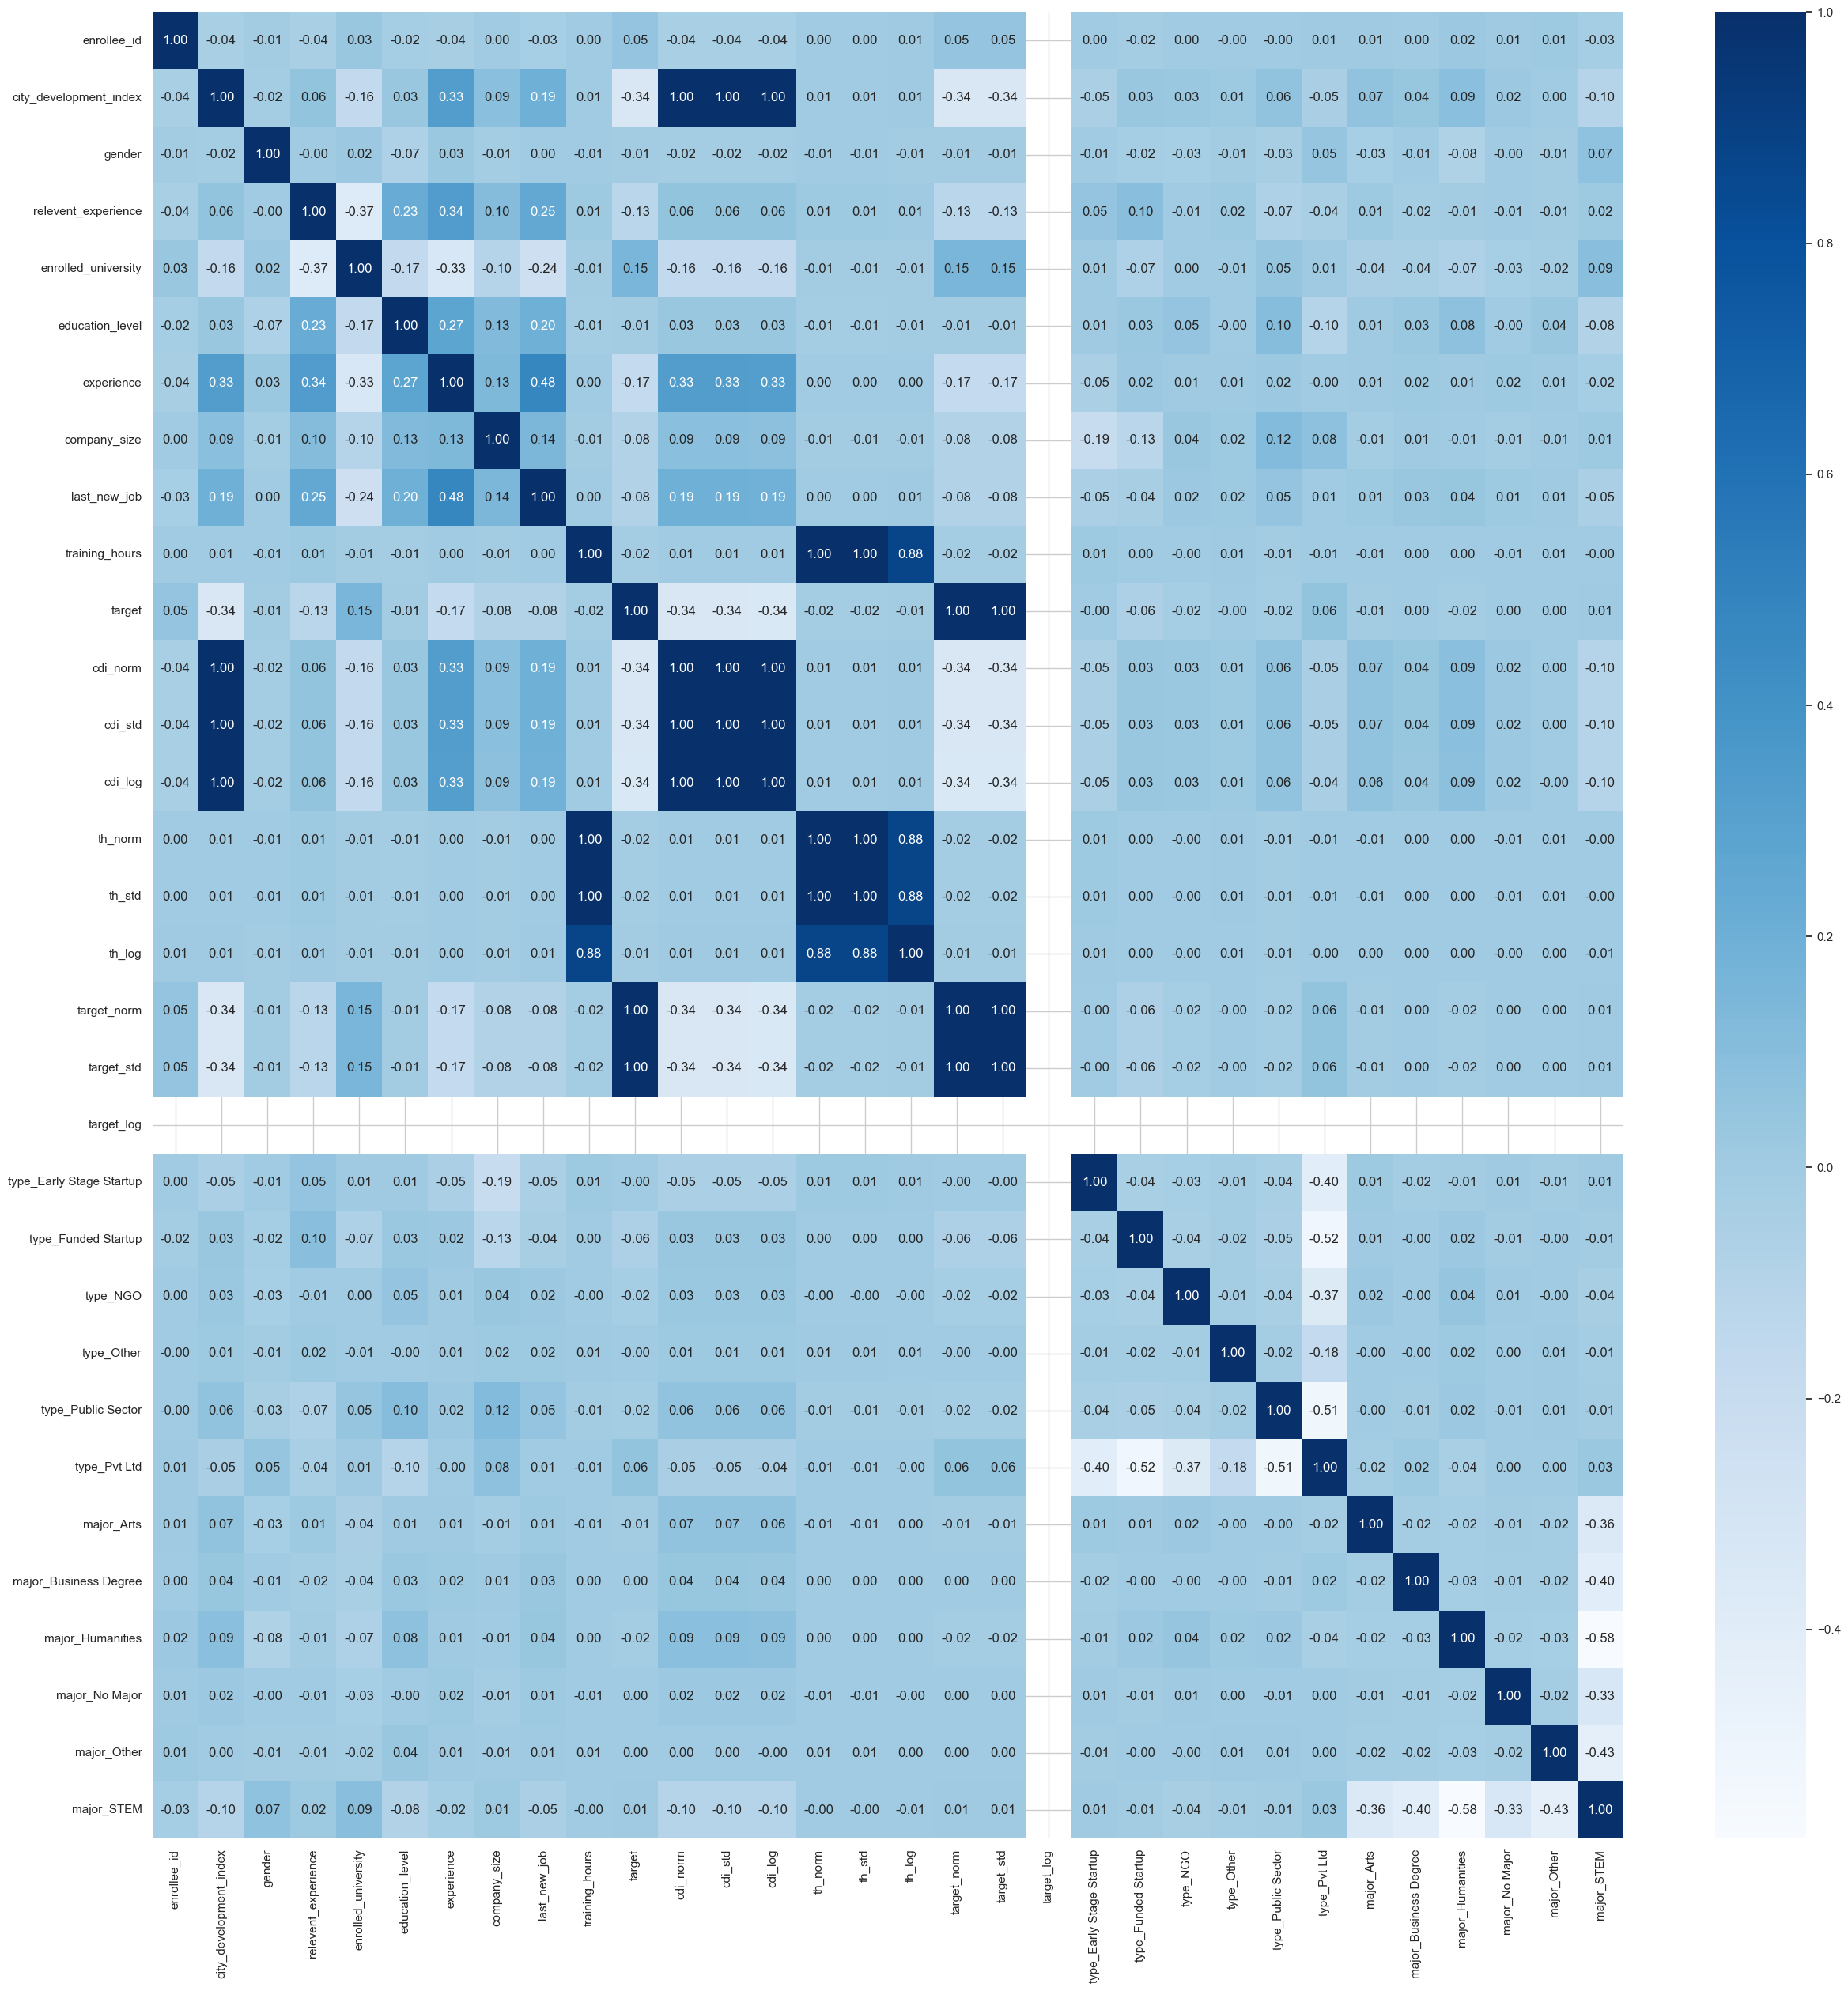

In [117]:
plt.figure(figsize=(30, 30))
sns.heatmap(new_df.corr(), cmap='Blues', annot=True, fmt='.2f')

## FEATURE ENGINEERING

### 1. FEATURE SELECTION

In [118]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18691 entries, 0 to 19157
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   enrollee_id               18691 non-null  int64  
 1   city                      18691 non-null  object 
 2   city_development_index    18691 non-null  float64
 3   gender                    18691 non-null  int64  
 4   relevent_experience       18691 non-null  int64  
 5   enrolled_university       18691 non-null  int64  
 6   education_level           18691 non-null  int64  
 7   major_discipline          18691 non-null  object 
 8   experience                18691 non-null  int64  
 9   company_size              18691 non-null  int64  
 10  company_type              18691 non-null  object 
 11  last_new_job              18691 non-null  int64  
 12  training_hours            18691 non-null  int64  
 13  target                    18691 non-null  float64
 14  cdi_no

In [119]:
new_df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target', 'cdi_norm', 'cdi_std',
       'cdi_log', 'th_norm', 'th_std', 'th_log', 'target_norm', 'target_std',
       'target_log', 'type_Early Stage Startup', 'type_Funded Startup',
       'type_NGO', 'type_Other', 'type_Public Sector', 'type_Pvt Ltd',
       'major_Arts', 'major_Business Degree', 'major_Humanities',
       'major_No Major', 'major_Other', 'major_STEM'],
      dtype='object')

In [120]:
columns_to_drop_1 = [
       'enrollee_id','gender','education_level','major_discipline','company_size','last_new_job','training_hours',
       'cdi_norm',
       'cdi_log', 'th_norm', 'th_log', 'target_norm',
       'target_log', 'type_Early Stage Startup', 'type_Funded Startup',
       'type_NGO', 'type_Other', 'type_Public Sector',
       'major_Arts', 'major_Business Degree', 'major_Humanities',
       'major_No Major', 'major_Other'
]

df_recommend = new_df.drop(columns=columns_to_drop_1)

In [121]:
df_recommend.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18691 entries, 0 to 19157
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    18691 non-null  object 
 1   city_development_index  18691 non-null  float64
 2   relevent_experience     18691 non-null  int64  
 3   enrolled_university     18691 non-null  int64  
 4   experience              18691 non-null  int64  
 5   company_type            18691 non-null  object 
 6   target                  18691 non-null  float64
 7   cdi_std                 18691 non-null  float64
 8   th_std                  18691 non-null  float64
 9   target_std              18691 non-null  float64
 10  type_Pvt Ltd            18691 non-null  uint8  
 11  major_STEM              18691 non-null  uint8  
dtypes: float64(5), int64(3), object(2), uint8(2)
memory usage: 1.6+ MB


### 2. FEATURE EXTRACTION

In [122]:
# Membuat featur category_experience

# Membuat tiga kategori berdasarkan nilai experience
bins = [0, 6, 12, 21]  # Rentang pengalaman untuk masing-masing kategori
labels = ['entry level', 'middle level', 'senior level']

# Menggunakan cut() untuk mengelompokkan nilai berdasarkan kategori
df_recommend['category_experience'] = pd.cut(df_recommend['experience'], bins=bins, labels=labels)

In [123]:
df_recommend.sample(5)

,city,city_development_index,relevent_experience,enrolled_university,experience,company_type,target,cdi_std,th_std,target_std,type_Pvt Ltd,major_STEM,category_experience
501,city_103,0.920,1,0,19,Pvt Ltd,0.0,0.738531,0.613181,-0.577288,1,0,senior level
8142,city_73,0.754,1,0,7,Pvt Ltd,0.0,-0.612930,-0.242933,-0.577288,1,1,middle level
12565,city_75,0.939,1,0,10,Pvt Ltd,0.0,0.893216,-0.365235,-0.577288,1,1,middle level
1075,city_67,0.855,0,0,8,Pvt Ltd,0.0,0.209344,0.409344,-0.577288,1,1,middle level
14772,city_7,0.647,1,0,6,Pvt Ltd,0.0,-1.484052,1.082005,-0.577288,1,0,entry level


In [124]:
#label encoding feature category_experience
category_experience_mapping = {
    'entry level': 0,
    'middle level': 1,
    'senior level': 2
}

df_recommend['category_experience'] = df_recommend['category_experience'].map(category_experience_mapping)

In [125]:
df_recommend.sample(5)

,city,city_development_index,relevent_experience,enrolled_university,experience,company_type,target,cdi_std,th_std,target_std,type_Pvt Ltd,major_STEM,category_experience
74,city_11,0.550,0,2,0,Pvt Ltd,0.0,-2.273761,-0.976745,-0.577288,1,1,NaN
10638,city_103,0.920,0,0,15,Pvt Ltd,0.0,0.738531,-0.548688,-0.577288,1,0,2
13252,city_67,0.855,1,0,10,Pvt Ltd,0.0,0.209344,1.082005,-0.577288,1,0,1
5185,city_71,0.884,1,0,6,Pvt Ltd,1.0,0.445443,1.510062,1.732236,1,1,0
10172,city_28,0.939,1,0,21,Pvt Ltd,0.0,0.893216,-0.202166,-0.577288,1,1,2


In [126]:
# Mengubah tipe data category menjadi integer
df_recommend['category_experience'] = df_recommend['category_experience'].cat.codes

In [127]:
df_recommend.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18691 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    18691 non-null  object 
 1   city_development_index  18691 non-null  float64
 2   relevent_experience     18691 non-null  int64  
 3   enrolled_university     18691 non-null  int64  
 4   experience              18691 non-null  int64  
 5   company_type            18691 non-null  object 
 6   target                  18691 non-null  float64
 7   cdi_std                 18691 non-null  float64
 8   th_std                  18691 non-null  float64
 9   target_std              18691 non-null  float64
 10  type_Pvt Ltd            18691 non-null  uint8  
 11  major_STEM              18691 non-null  uint8  
 12  category_experience     18691 non-null  int8   
dtypes: float64(5), int64(3), int8(1), object(2), uint8(2)
memory usage: 1.6+ MB


<Axes: >

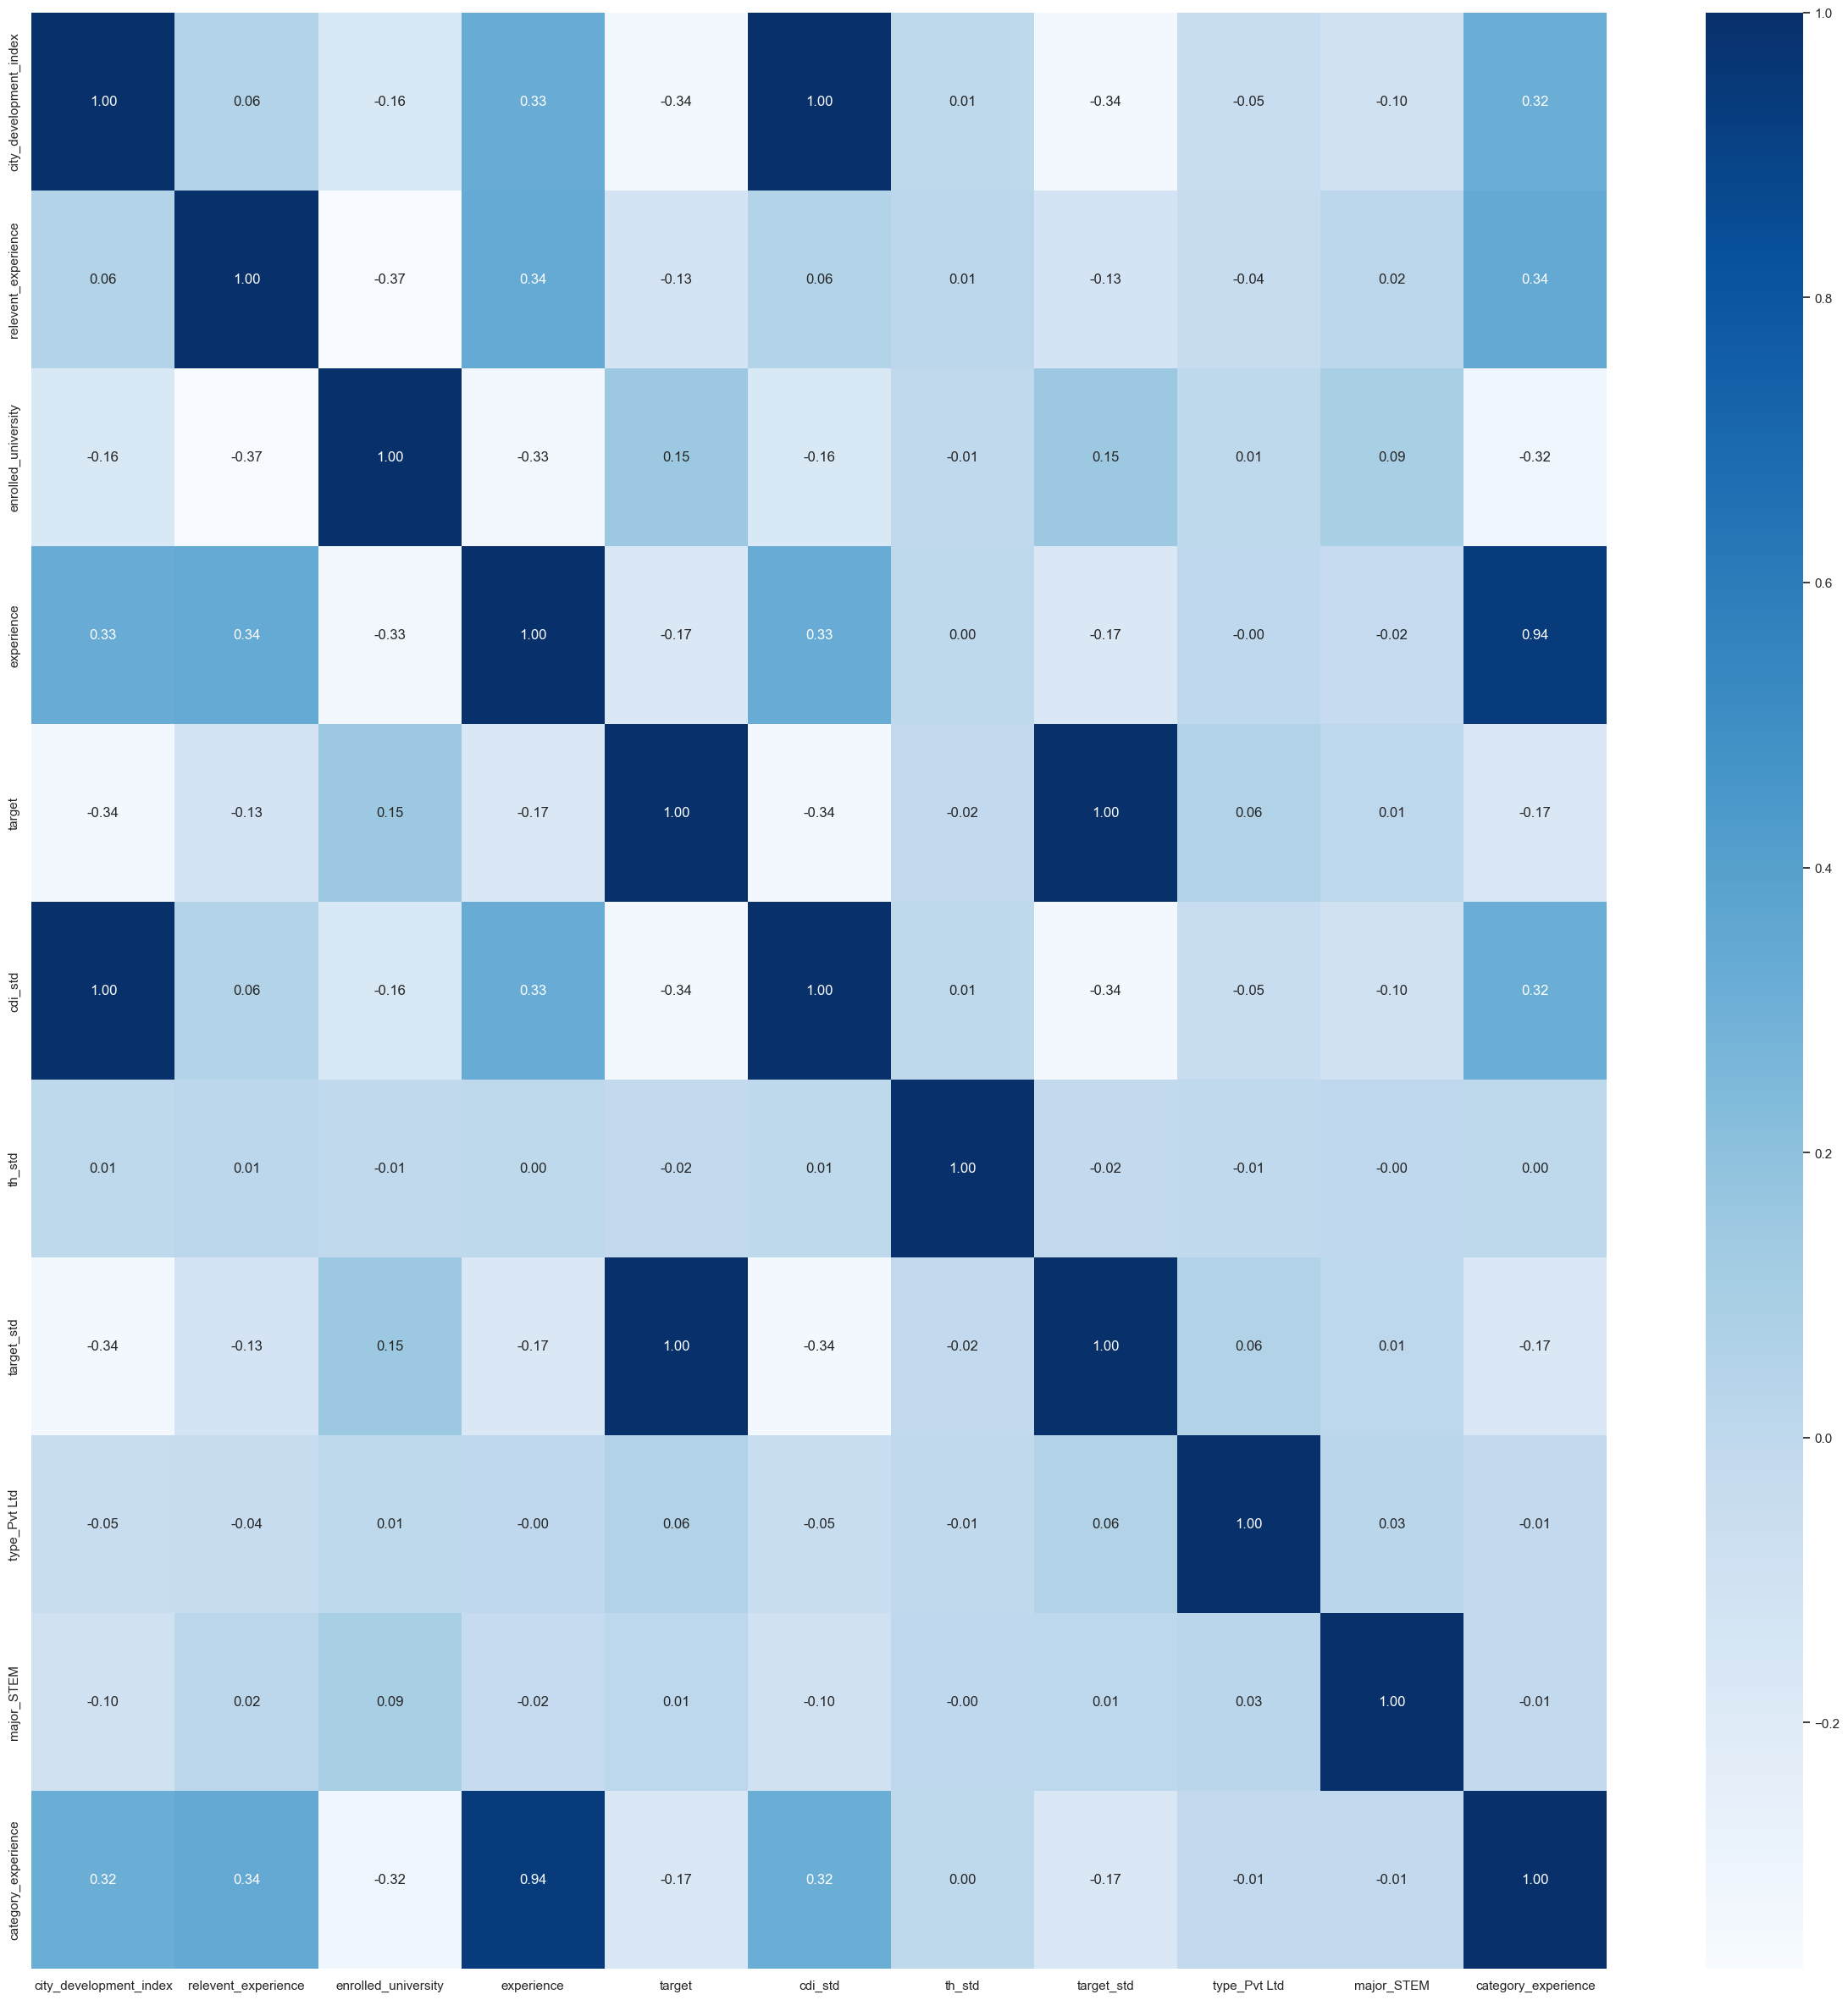

In [128]:
plt.figure(figsize=(30, 30))
sns.heatmap(df_recommend.corr(), cmap='Blues', annot=True, fmt='.2f')

In [129]:
columns_to_drop_2 = [
       'experience'
]

df_recommend = df_recommend.drop(columns=columns_to_drop_2)

In [130]:
df_recommend.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18691 entries, 0 to 19157
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    18691 non-null  object 
 1   city_development_index  18691 non-null  float64
 2   relevent_experience     18691 non-null  int64  
 3   enrolled_university     18691 non-null  int64  
 4   company_type            18691 non-null  object 
 5   target                  18691 non-null  float64
 6   cdi_std                 18691 non-null  float64
 7   th_std                  18691 non-null  float64
 8   target_std              18691 non-null  float64
 9   type_Pvt Ltd            18691 non-null  uint8  
 10  major_STEM              18691 non-null  uint8  
 11  category_experience     18691 non-null  int8   
dtypes: float64(5), int64(2), int8(1), object(2), uint8(2)
memory usage: 1.5+ MB


### F. Handle Class Imbalance

In [131]:
df_recommend['target'].value_counts(normalize=True)

0.0    0.75004
1.0    0.24996
Name: target, dtype: float64

In [132]:
from imblearn.over_sampling import SMOTE

class_distribution = df_recommend['target'].value_counts()
smote = SMOTE(random_state=12345)
X_resampled, y_resampled = smote.fit_resample(df_recommend[['target']].values,df_recommend['target'].values)

In [133]:
y_resampled_series = pd.Series(y_resampled)

class_distribution = y_resampled_series.value_counts(normalize=True)

In [134]:
class_distribution

1.0    0.5
0.0    0.5
dtype: float64

### 3. FEATURE TAMBAHAN

Feature Tambahan yang bisa dimasukan kedalam dataset ini adalah sebagai berikut:
1. Age Of Candidate: Feature tersebut dapat menjelaskan sebaran umur kandidat yang ada dalam dataset.
2. Salary Information: Feature tersebut dapat menjelaskan terkait gaji saat ini, gaji yang diharapkan atau tingkat pertumbuhan gaji. Fitur ini penting dibuat untuk memahami motivasi kanddat dalam pergantian pekerjaan atau tidak.
3. Industry Experience: Feature tersebut dapat menjelaskan total pengalaman kandidat yang relevan dengan role Data Scientists. Dalam data set hanya ada feature experience yang menjelaskan total pengalaman kandidat secara umum dan tidak spesifik total berapa tahun kandidat tersebut memiliki pengalaman di role Data Scientists.
4. Company Information : Feature tersebut dapat menjelaskan informasi lebih rinci tentang perusahaan tempat kandidat bekerja seperti nama perusahaan atau perusahaan tersebut bergerak dibidang apa.